# **NOTEBOOK FOR `ANALYSIS` OF `OLIST` DATA**
***

- ***Goal is to find low review score factors***

## ***Starting of analysis***

### **Data Import, Creating Connection and Checking the data**

In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
import pandas as pd
import numpy as np
from sqlalchemy import create_engine, text
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
def get_project_root(project_name="ranojoy_data_analytics_projects"):
    current_path = Path.cwd()
    if project_name in str(current_path):
        while current_path.name != project_name:
            current_path = current_path.parent
        return current_path
    else:
        for path in current_path.rglob(project_name):
            if path.is_dir():
                return path
        raise FileNotFoundError(f"Could not find project: {project_name}")

repo_root = get_project_root()
data_path = repo_root / "Inside Olist - Review Score Impact Analysis"

sys.path.append(str(data_path))

import src.functions as F
import src.plots as P
import src.stat_tests as S

warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

print(f"✅ Setup Complete. Root: {repo_root}")

✅ Setup Complete. Root: C:\Users\Rano's PC\Machine\github_repo_cloned\ranojoy_data_analytics_projects


In [3]:
file_path = data_path / "data" / "processed_data" / "processed_synthea_data.csv"

data = pd.read_csv(file_path)

In [4]:
pd.set_option('display.max_columns',None)

In [5]:
data.head()

,review_score,review_creation_date,total_unique_products,total_products,avg_price,avg_freight,is_multiple_seller,max_attempt,payment_type_used,installment_duration,total_paid_value,order_status,approval_time,delivery_time,delivery_delay,product_id,product_category_name,dimensional_weight
0,4,2018-01-18,1,2,185.0,14.0,0,1,1,8,397.26,delivered,0.0,6.0,-16.0,2.0,1.0,10.50
1,5,2018-03-10,1,1,80.0,8.0,0,1,1,1,88.09,delivered,0.0,9.0,-5.0,1.0,1.0,0.62
2,5,2018-02-17,1,1,149.0,45.0,0,1,1,1,194.12,delivered,0.0,13.0,-21.0,1.0,1.0,1.33
3,5,2017-04-21,1,1,180.0,43.0,0,1,1,1,222.84,delivered,0.0,11.0,-20.0,1.0,1.0,1.33
4,5,2018-03-01,1,1,1199.0,134.0,0,1,1,10,1333.25,delivered,0.0,18.0,-9.0,1.0,1.0,30.62


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   review_score           99224 non-null  int64  
 1   review_creation_date   99224 non-null  object 
 2   total_unique_products  99224 non-null  int64  
 3   total_products         99224 non-null  int64  
 4   avg_price              99224 non-null  float64
 5   avg_freight            99224 non-null  float64
 6   is_multiple_seller     99224 non-null  int64  
 7   max_attempt            99224 non-null  int64  
 8   payment_type_used      99224 non-null  int64  
 9   installment_duration   99224 non-null  int64  
 10  total_paid_value       99224 non-null  float64
 11  order_status           99224 non-null  object 
 12  approval_time          99068 non-null  float64
 13  delivery_time          96359 non-null  float64
 14  delivery_delay         96359 non-null  float64
 15  pr

In [7]:
data['review_score']=data['review_score'].apply(lambda x: 'low' if x<4 else 'high')

In [8]:
data.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
total_unique_products,99224.0,1.03,0.24,0.0,1.00,1.00,1.00,8.00
total_products,99224.0,1.13,0.54,0.0,1.00,1.00,1.00,21.00
avg_price,99224.0,124.63,188.92,0.0,40.00,79.00,139.00,6735.00
avg_freight,99224.0,20.02,15.81,0.0,13.00,16.00,21.00,410.00
is_multiple_seller,99224.0,0.01,0.11,0.0,0.00,0.00,0.00,1.00
max_attempt,99224.0,1.05,0.38,0.0,1.00,1.00,1.00,29.00
payment_type_used,99224.0,1.02,0.15,0.0,1.00,1.00,1.00,2.00
installment_duration,99224.0,2.93,2.72,0.0,1.00,2.00,4.00,24.00
total_paid_value,99224.0,160.56,220.32,0.0,61.88,105.28,176.71,13664.08
approval_time,99068.0,0.52,1.17,0.0,0.00,0.00,1.00,188.00


### ***Outlier Interpretation from numerical columns***
*** 
- **`average_price` column have 75th percentile value as `139` and max value as `6735`**

- **`average_freight` column have `21` as 75th percentile value, and `410` as max value**

- **`max_attempt` column have `29` as max value while 75th percentile as `1`**

- **max `total_paid_value` is `13664` while 75th percentile is `176` only**

- **max `approval_time` is `188` days while mean, and median is nearly `0`**

- **max `delivery_time` is `208` days while 75th percentile of values lies under `16`**

- **max `delivery_delay` is `188` days while 75th percentile of values lies under `0`**

***

In [9]:
data.describe(include='object').T

,count,unique,top,freq
review_score,99224,2,high,76470
review_creation_date,99224,636,2017-12-19,463
order_status,99224,8,delivered,96361


### ***Statistical insights from categorical columns***
***
- **There are 8 unique classes in `orderstatus` column**

***

## ***Univariate Analysis***

### **Cat Cols**

**is_multiple_seller**

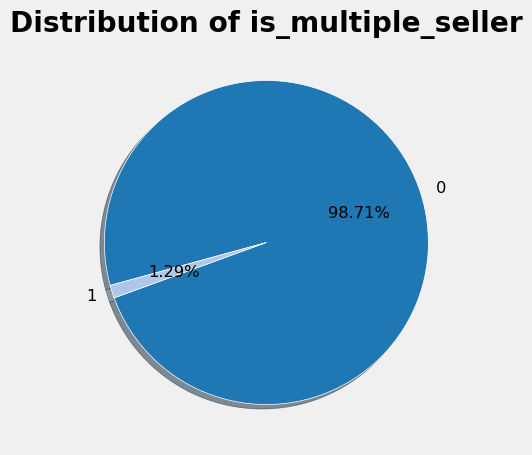

In [10]:
plt.figure(figsize=(5,5))
P.plot_pie(column='is_multiple_seller',data = data)
plt.show()

***
- **`multiple_seller` column have more than `98%`occurances of `0`**
***

**payment_type_used**

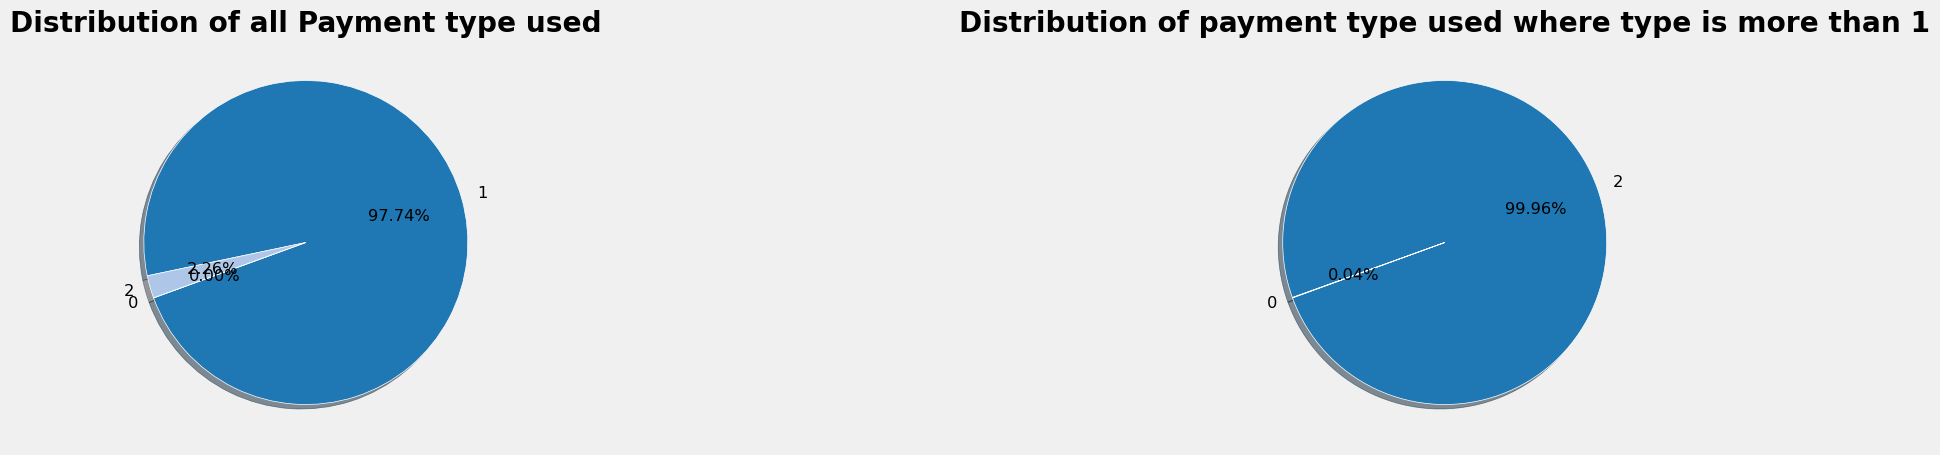

In [96]:
plt.figure(figsize=(24,5))
plt.subplot(1,2,1)
P.plot_pie(column='payment_type_used',data = data)
plt.title('Distribution of all Payment type used',weight = 'bold')
plt.subplot(1,2,2)
P.plot_pie(column='payment_type_used',data = data[data['payment_type_used'] != 1])
plt.title("Distribution of payment type used where type is more than 1",weight = 'bold')
plt.show()

***
- **`97%` of times people used only single payment type**
***

**product_category_name**

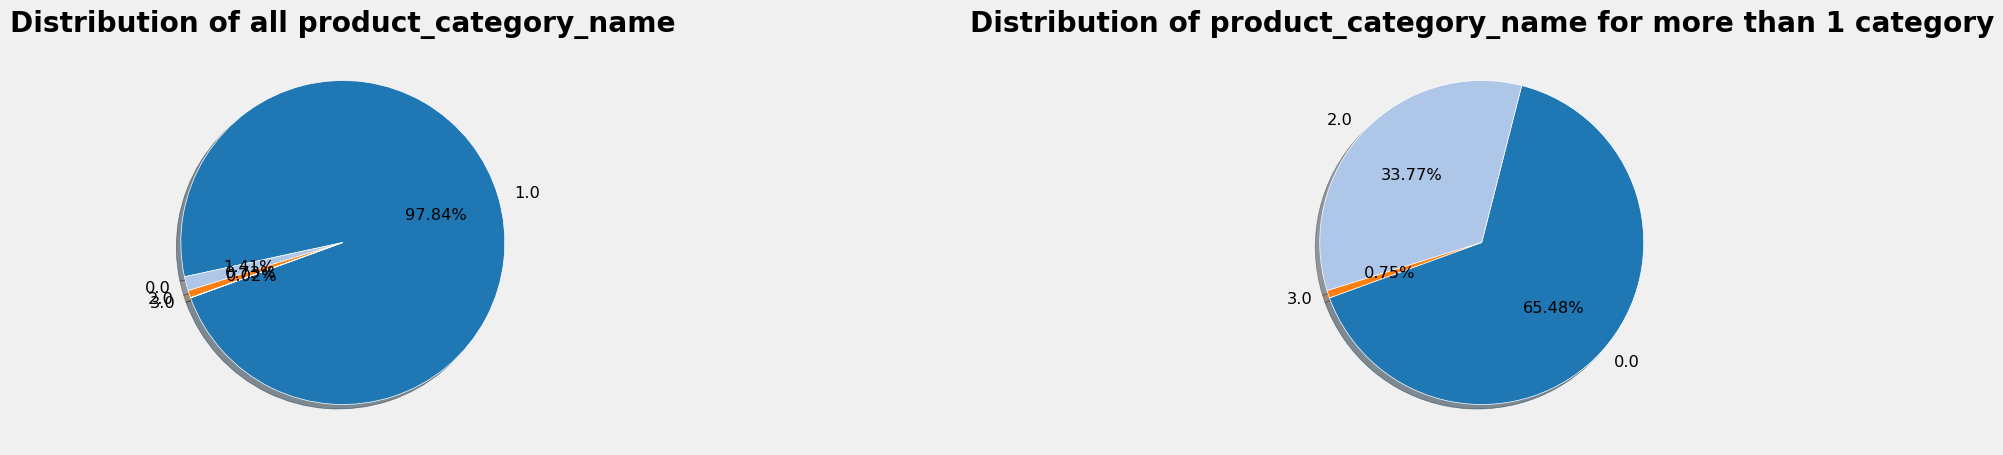

In [97]:
plt.figure(figsize=(24,5))
plt.subplot(1,2,1)
P.plot_pie(column='product_category_name',data = data)
plt.title('Distribution of all product_category_name',weight = 'bold')
plt.subplot(1,2,2)
P.plot_pie(column='product_category_name',data = data[data['product_category_name'] != 1])
plt.title("Distribution of product_category_name for more than 1 category",weight = 'bold')
plt.show()

***
- **more than `97%` of occurances is `single` product category**
***

**order_status**

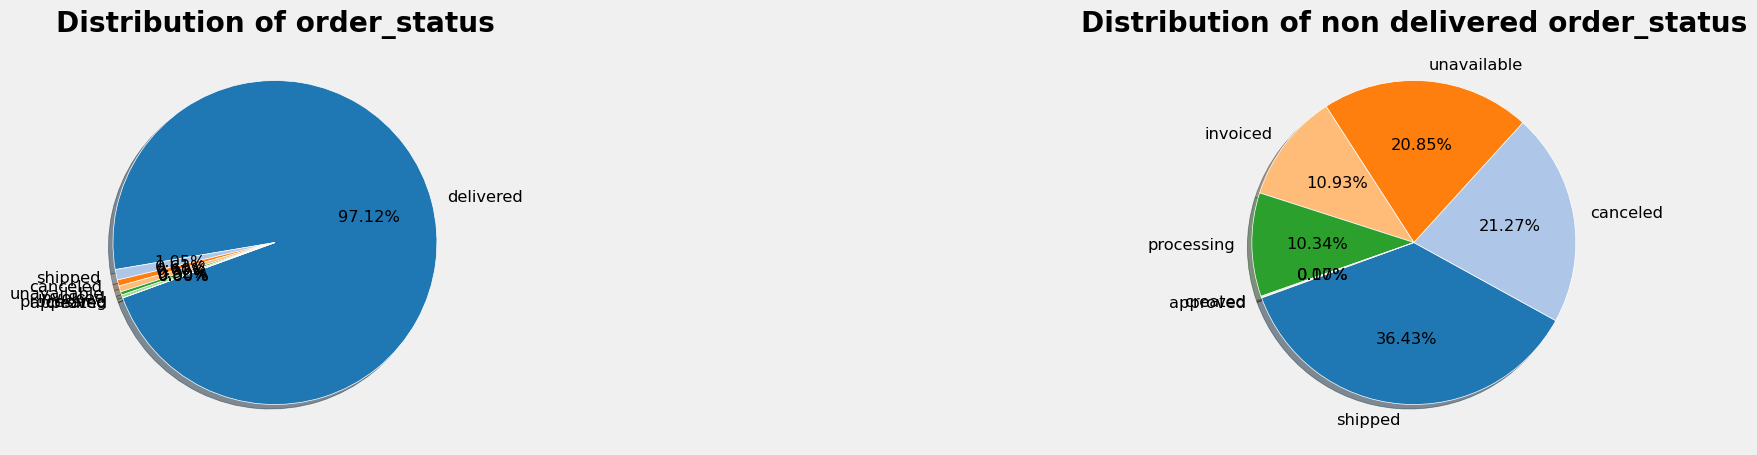

In [98]:
plt.figure(figsize=(24,5))
plt.subplot(1,2,1)
P.plot_pie(column='order_status',data = data)
plt.title('Distribution of order_status',weight = 'bold')
plt.subplot(1,2,2)
P.plot_pie(column='order_status',data = data[data['order_status'] != 'delivered'])
plt.title("Distribution of non delivered order_status",weight = 'bold')
plt.show()

***
- **more than `97%` of orders are `delivered`, and among `non delivered` orders - most of the orders are `shipped`**
***

### **Large Numerical Cols**

**total_products**

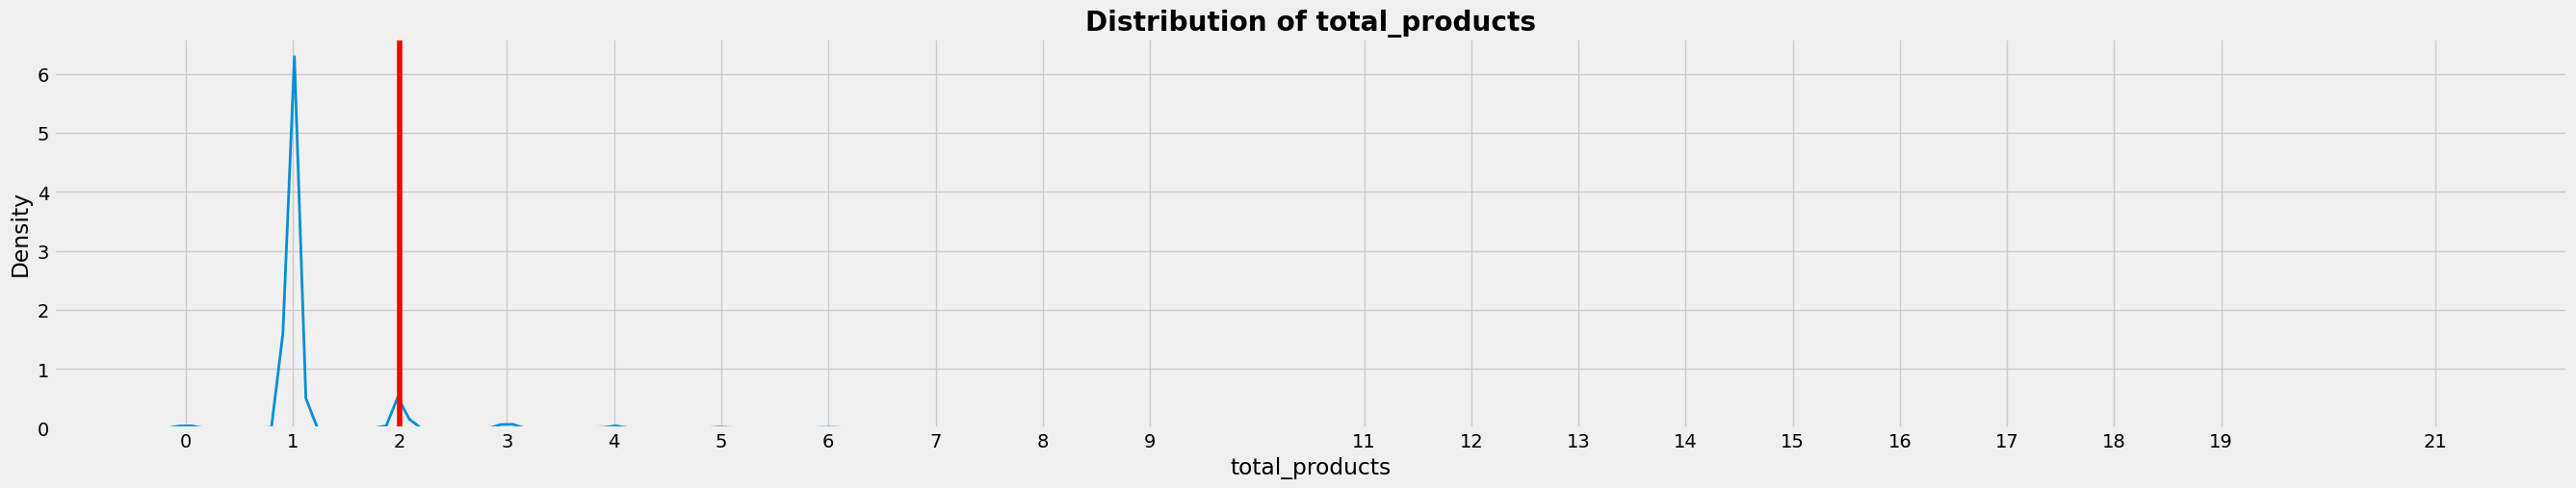

In [14]:
plt.figure(figsize=(30,5))
P.plot_kde(column= 'total_products',data= data)
plt.show()

In [15]:
data.groupby('total_products').size()

total_products
0       759
1     88699
2      7496
3      1311
4       503
5       204
6       194
7        22
8         8
9         3
10        8
11        5
12        5
13        1
14        2
15        2
20        1
21        1
dtype: int64

In [16]:
data['total_products']=data['total_products'].apply(lambda x: '7+' if x>6 else str(x))

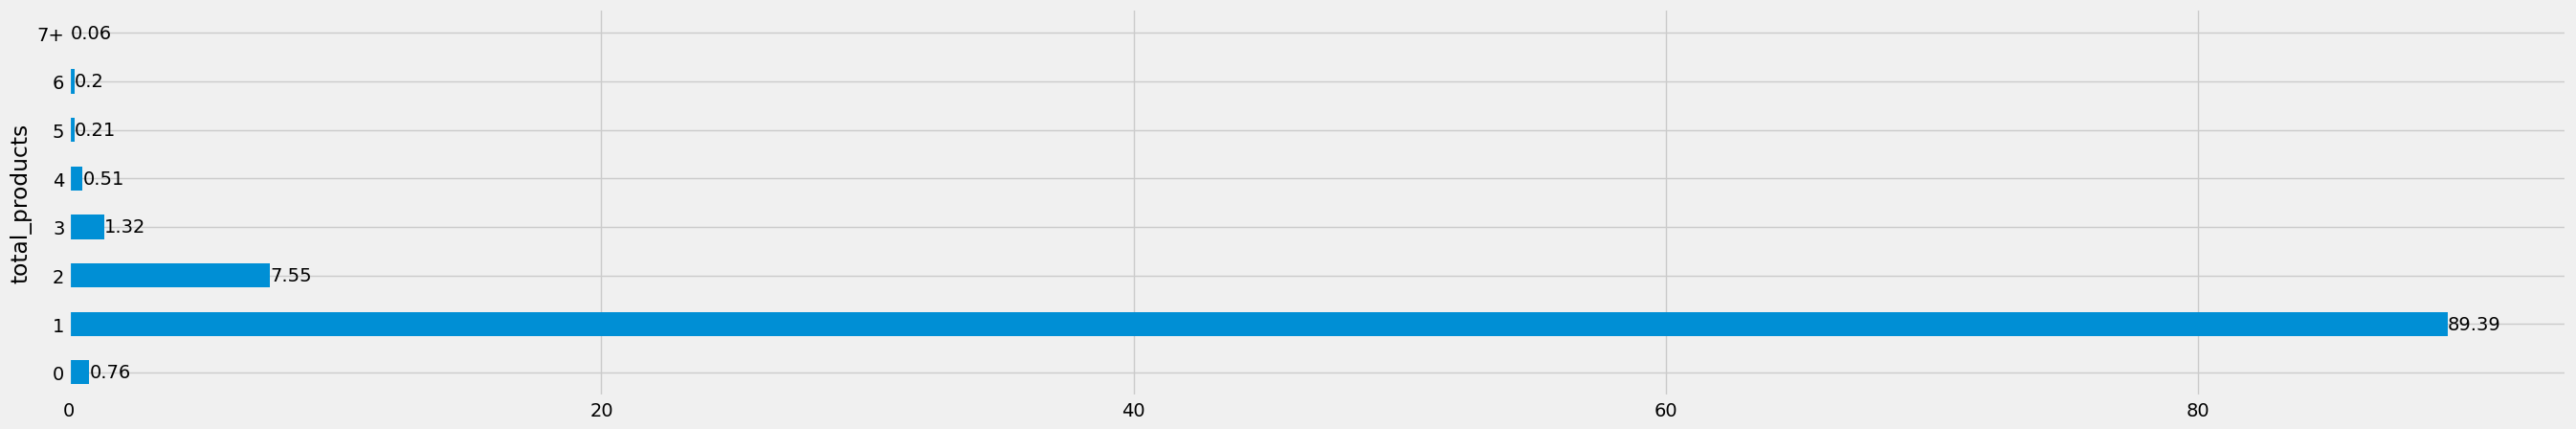

In [17]:
plt.figure(figsize=(30,5))
ax = data.groupby('total_products').size().div(len(data)).mul(100).round(2).plot(kind = 'barh')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

***
- **in `~90%` of observations, `total_procuts` is `1` for any order**
***

**avg_price**

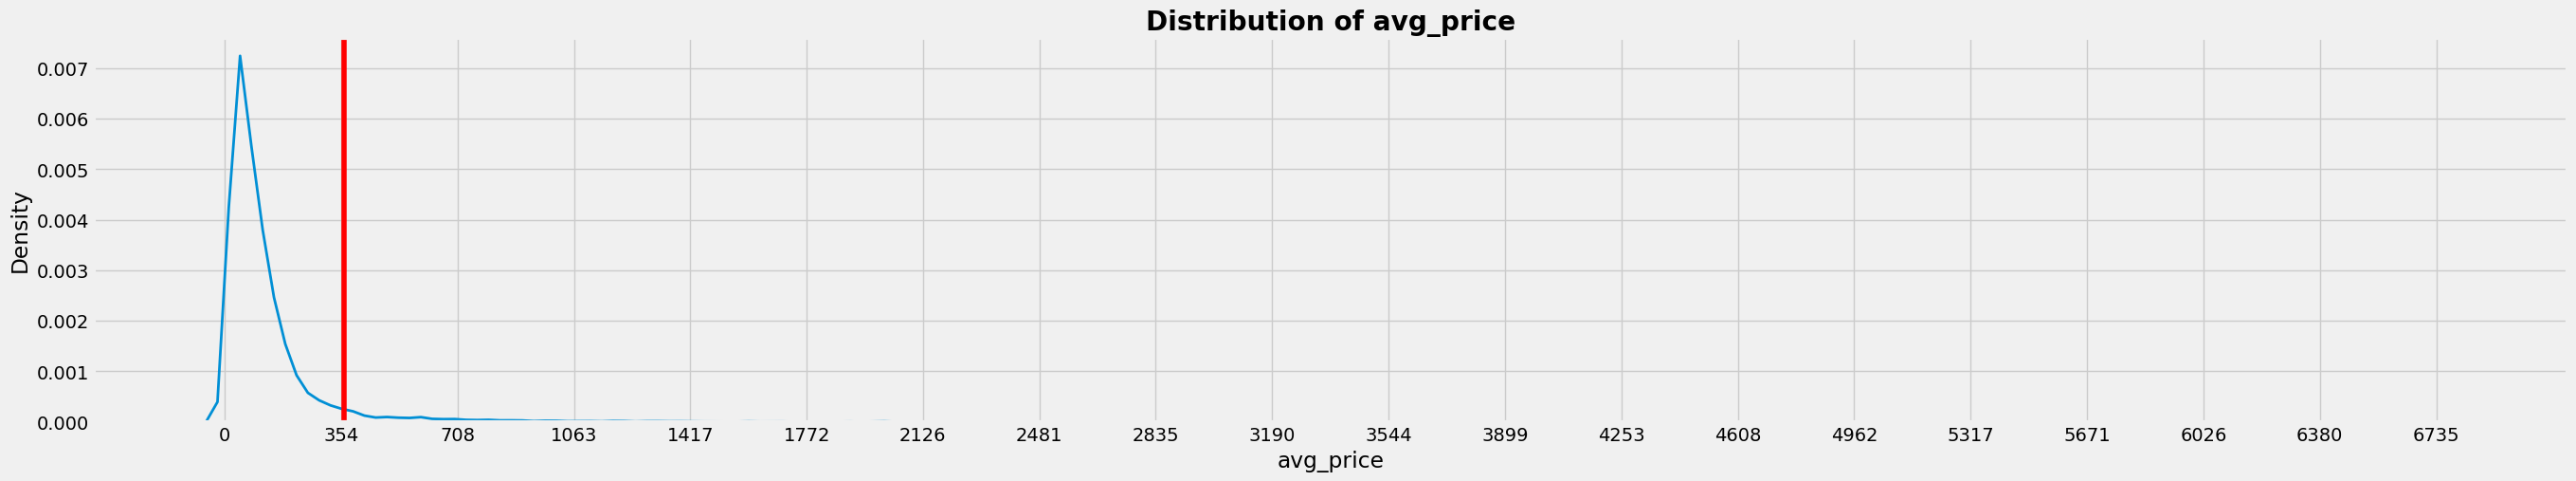

In [18]:
plt.figure(figsize=(30,5))
P.plot_kde(column= 'avg_price',data= data)
plt.show()

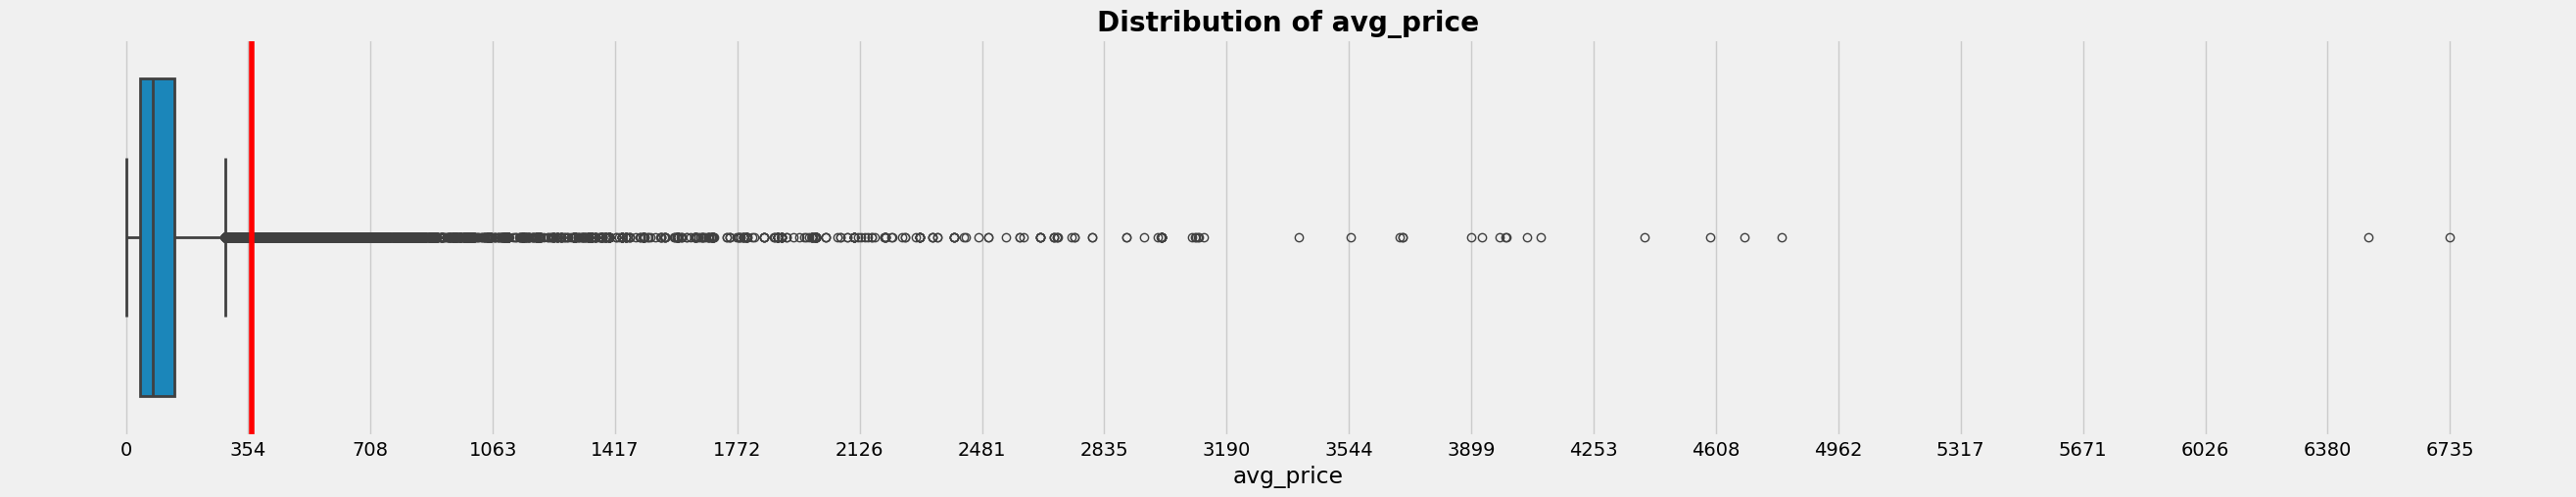

In [19]:
plt.figure(figsize=(30,5))
P.plot_box(column= 'avg_price',data= data)
plt.show()

***
- **`average_price` have many outliers, and the 95th percentile value is around 350**

- **`average_price` is skewed towards right**
***

**avg_freight**

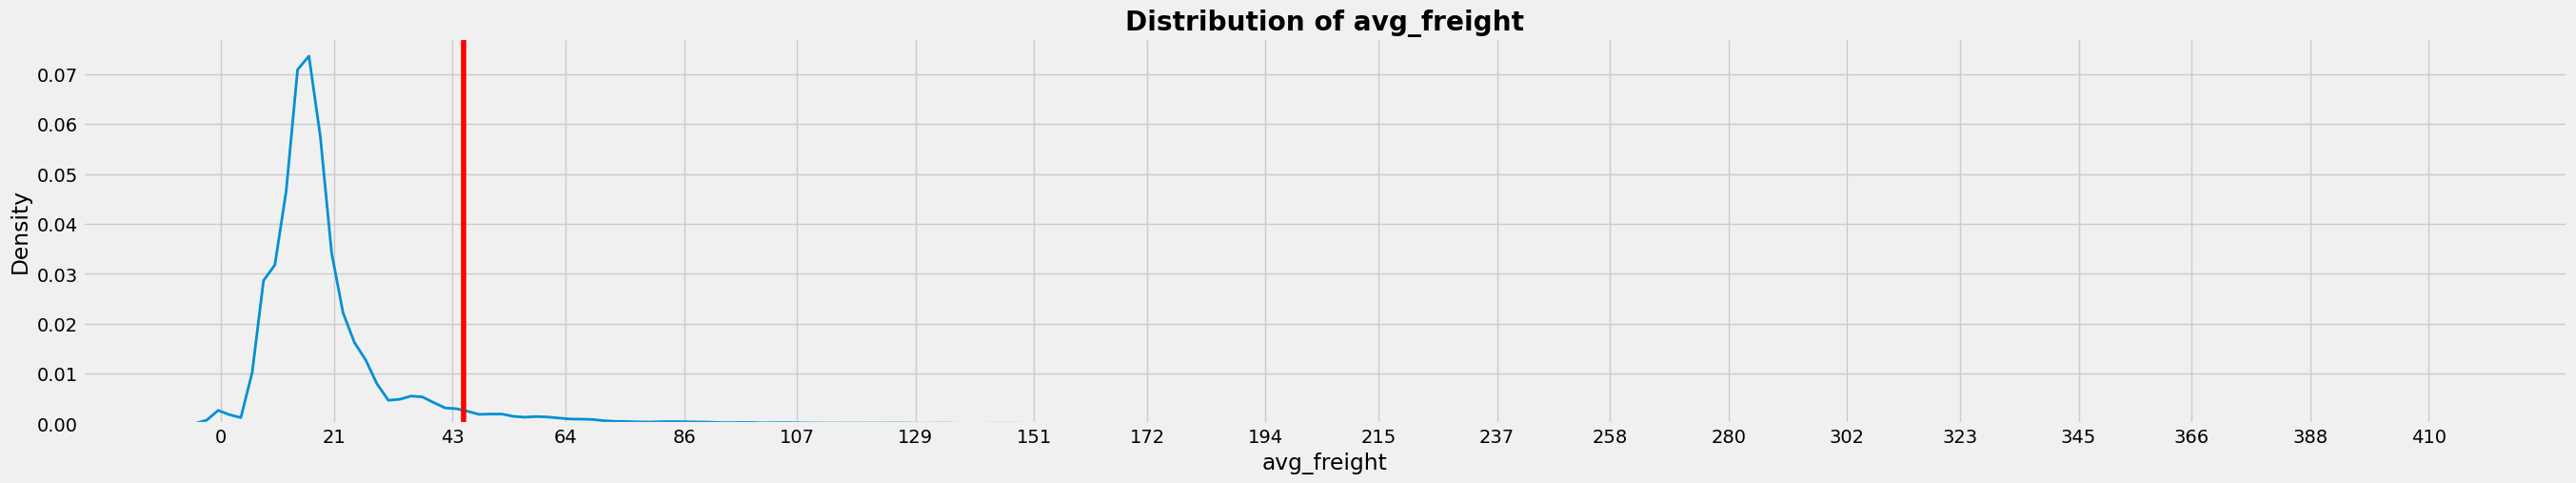

In [20]:
plt.figure(figsize=(30,5))
P.plot_kde(column= 'avg_freight',data= data)
plt.show()

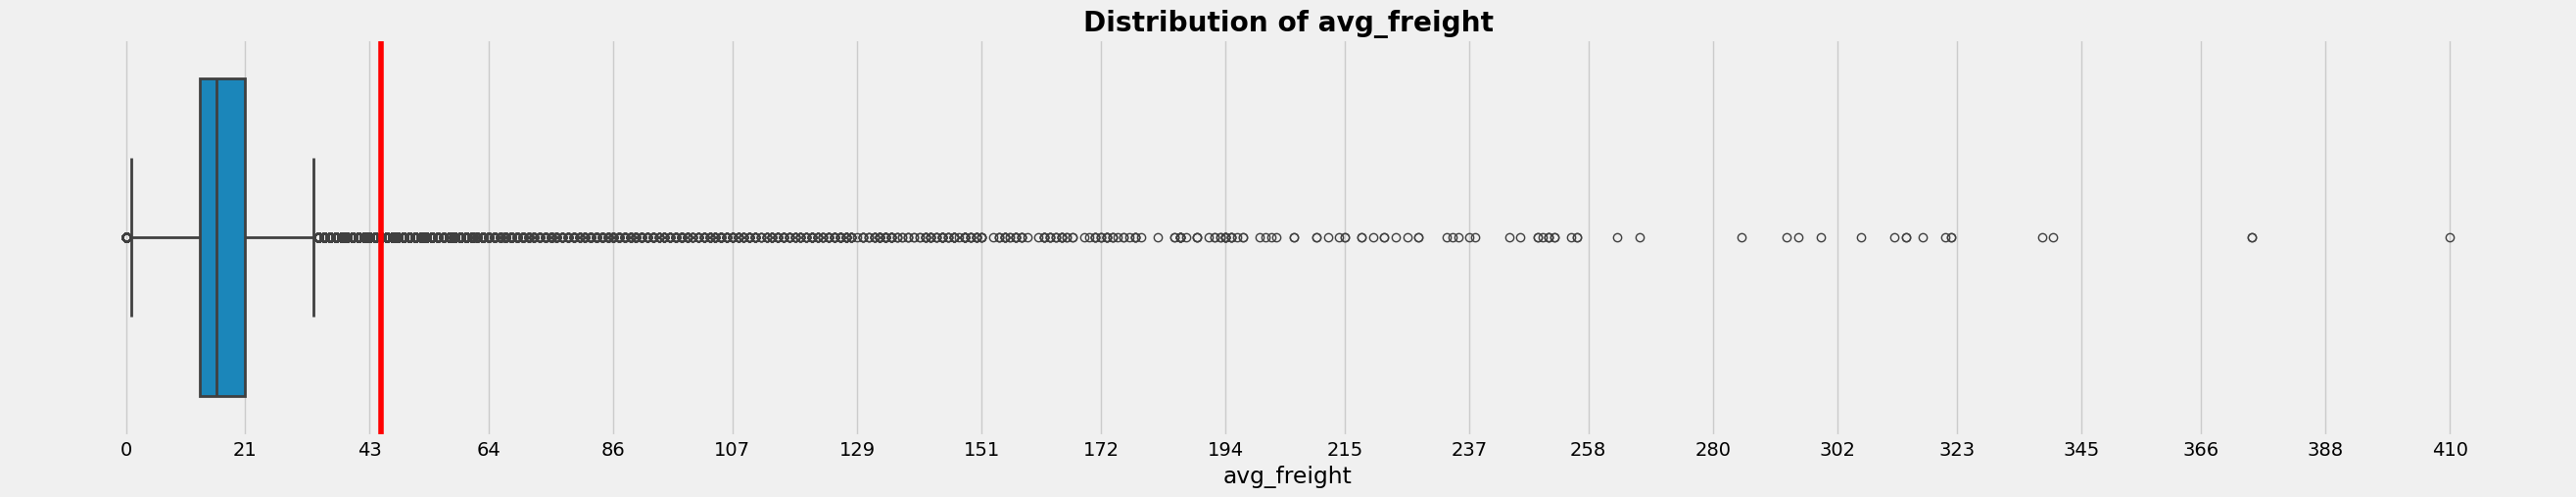

In [21]:
plt.figure(figsize=(30,5))
P.plot_box(column= 'avg_freight',data= data)
plt.show()

***
- **`average_freight` have many outliers, and the 95th percentile value is around 45**

- **`average_freight` is skewed towards right**
***

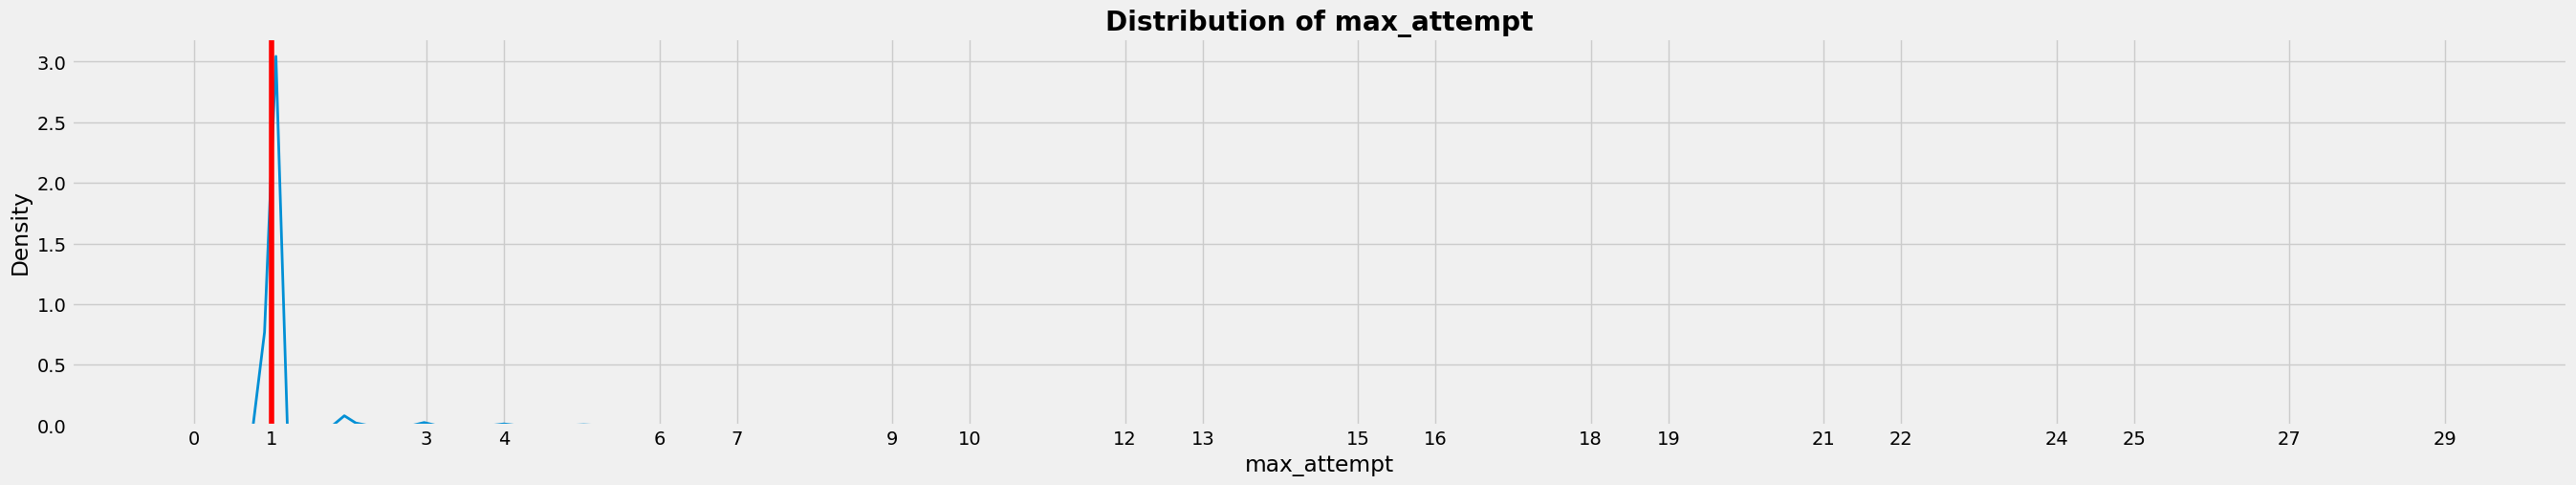

In [22]:
plt.figure(figsize=(30,5))
P.plot_kde(column= 'max_attempt',data= data)
plt.show()

In [23]:
data.groupby('max_attempt').size()

max_attempt
0         1
1     96194
2      2446
3       302
4       109
5        52
6        36
7        28
8        12
9         9
10        5
11        8
12        9
13        3
14        2
15        2
19        2
21        1
22        1
26        1
29        1
dtype: int64

In [24]:
data['max_attempt']=data['max_attempt'].apply(lambda x: '4+' if x>=4 else str(x))

In [25]:
data['max_attempt']=data['max_attempt'].apply(lambda x: '4+' if x=='0' else str(x))

In [26]:
data.groupby('max_attempt').size()

max_attempt
1     96194
2      2446
3       302
4+      282
dtype: int64

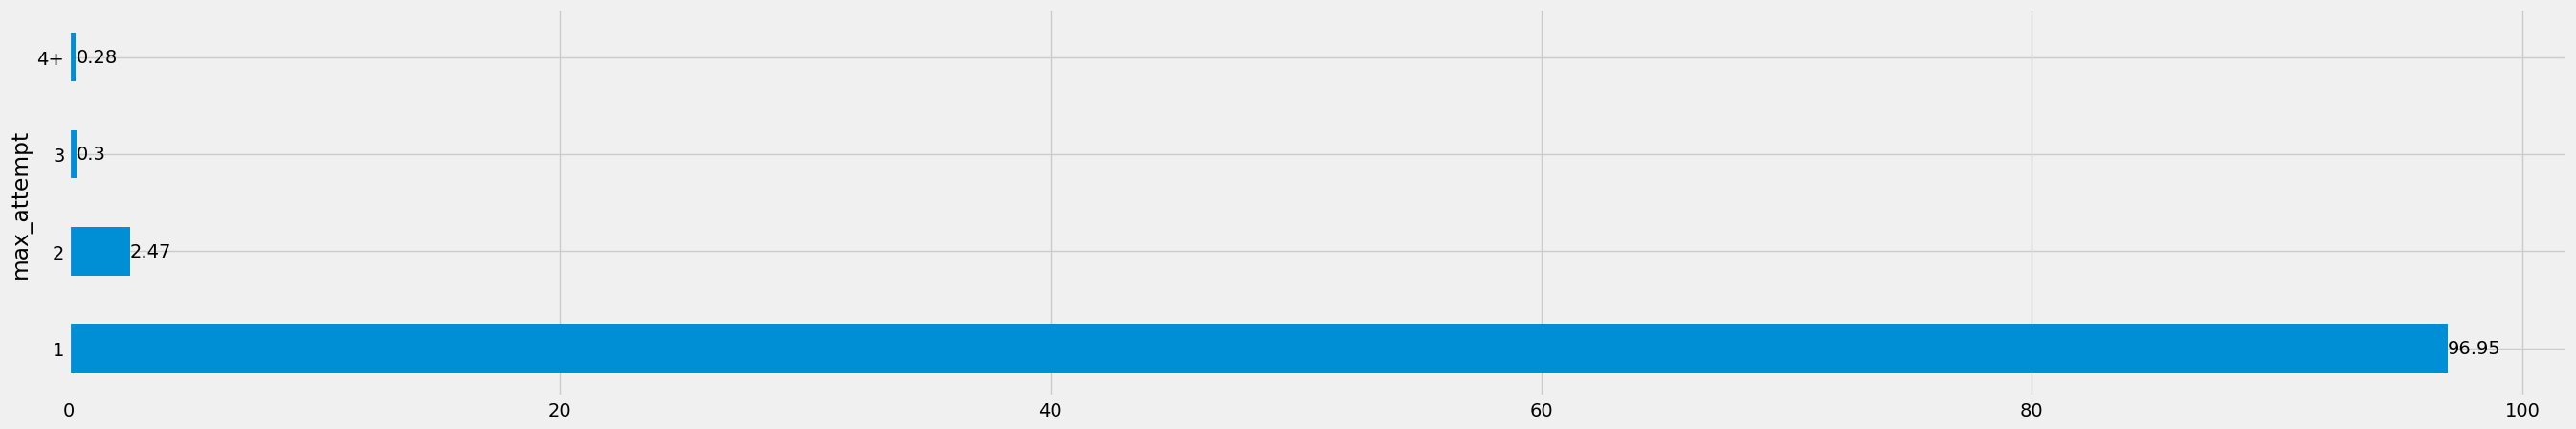

In [27]:
plt.figure(figsize=(30,5))
ax = data.groupby('max_attempt').size().div(len(data)).mul(100).round(2).plot(kind = 'barh')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

***
- **`max_attempt` have value 1 as ~97% of total observations**

- **less than `1%` of people attempted `4+` times**
***

**installment_duration**

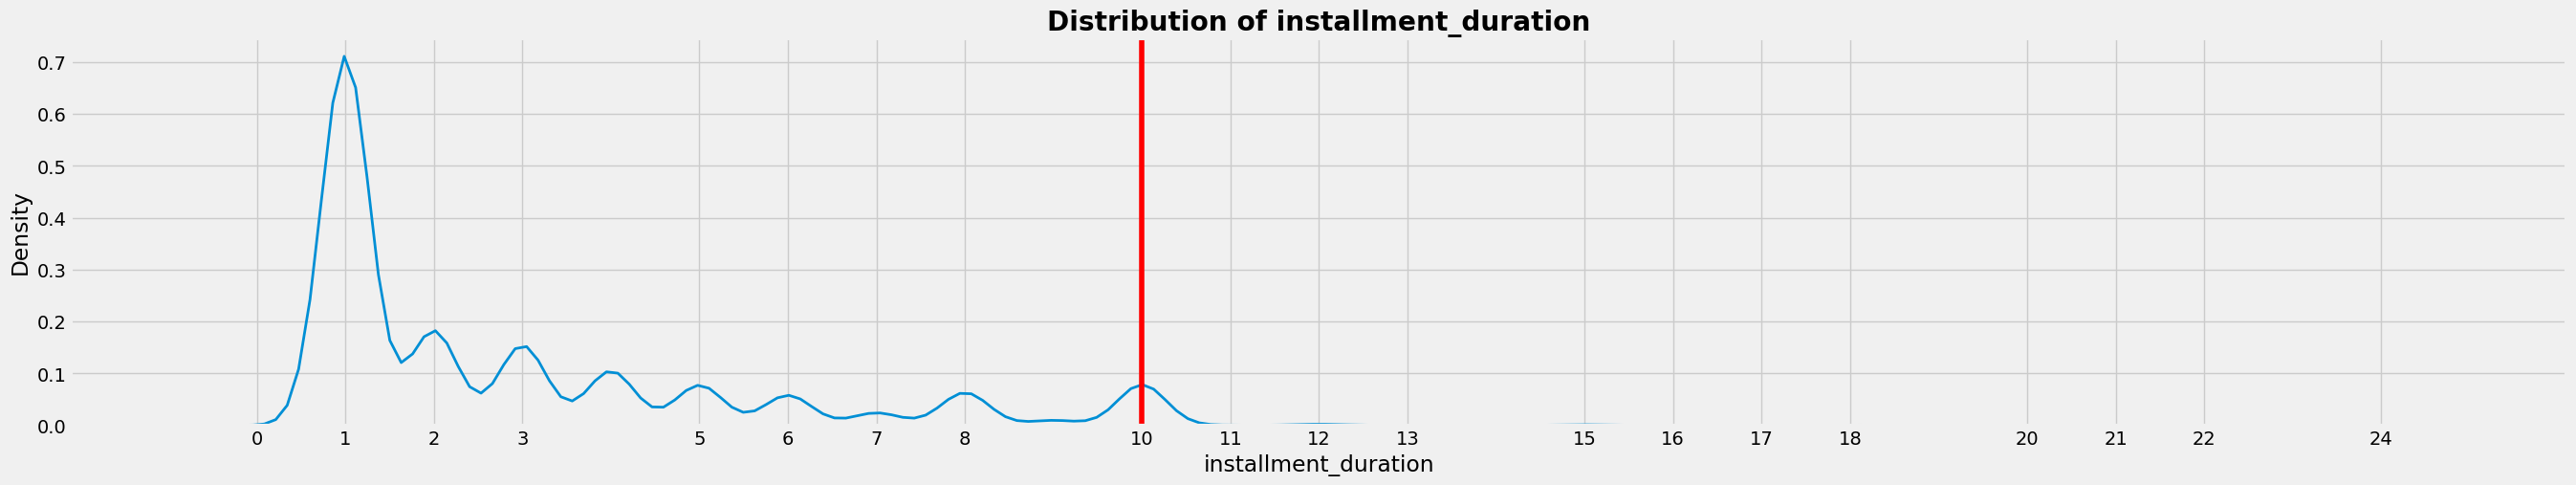

In [28]:
plt.figure(figsize=(30,5))
P.plot_kde(column= 'installment_duration',data= data)
plt.show()

In [29]:
data.groupby('installment_duration').size()

installment_duration
0         3
1     48168
2     12305
3     10404
4      7067
5      5213
6      3908
7      1615
8      4253
9       638
10     5310
11       22
12      133
13       17
14       15
15       73
16        5
17        8
18       27
20       16
21        4
22        1
23        1
24       18
dtype: int64

In [30]:
data['installment_duration']=data['installment_duration'].apply(lambda x: '10+' if (x>10) | (x == 0)  else str(x))

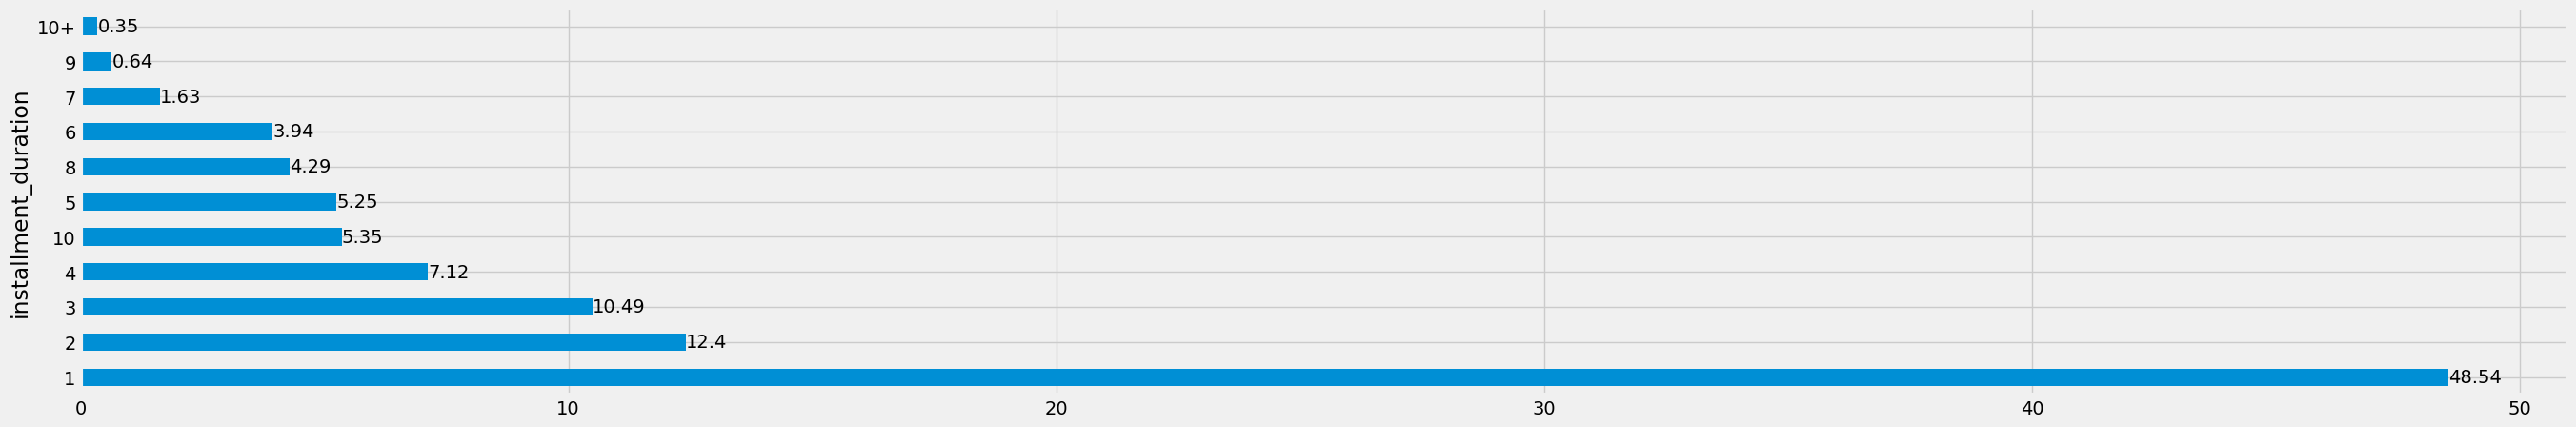

In [31]:
plt.figure(figsize=(30,5))
ax = data.groupby('installment_duration').size().div(len(data)).mul(100).round(2).sort_values(ascending=False).plot(kind = 'barh')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

***
- **nearly `half` of the observation have `1` in `payment_installment` column**

- **less than `.5%` of observation have `10+` installments**
***

**total_paid_value**

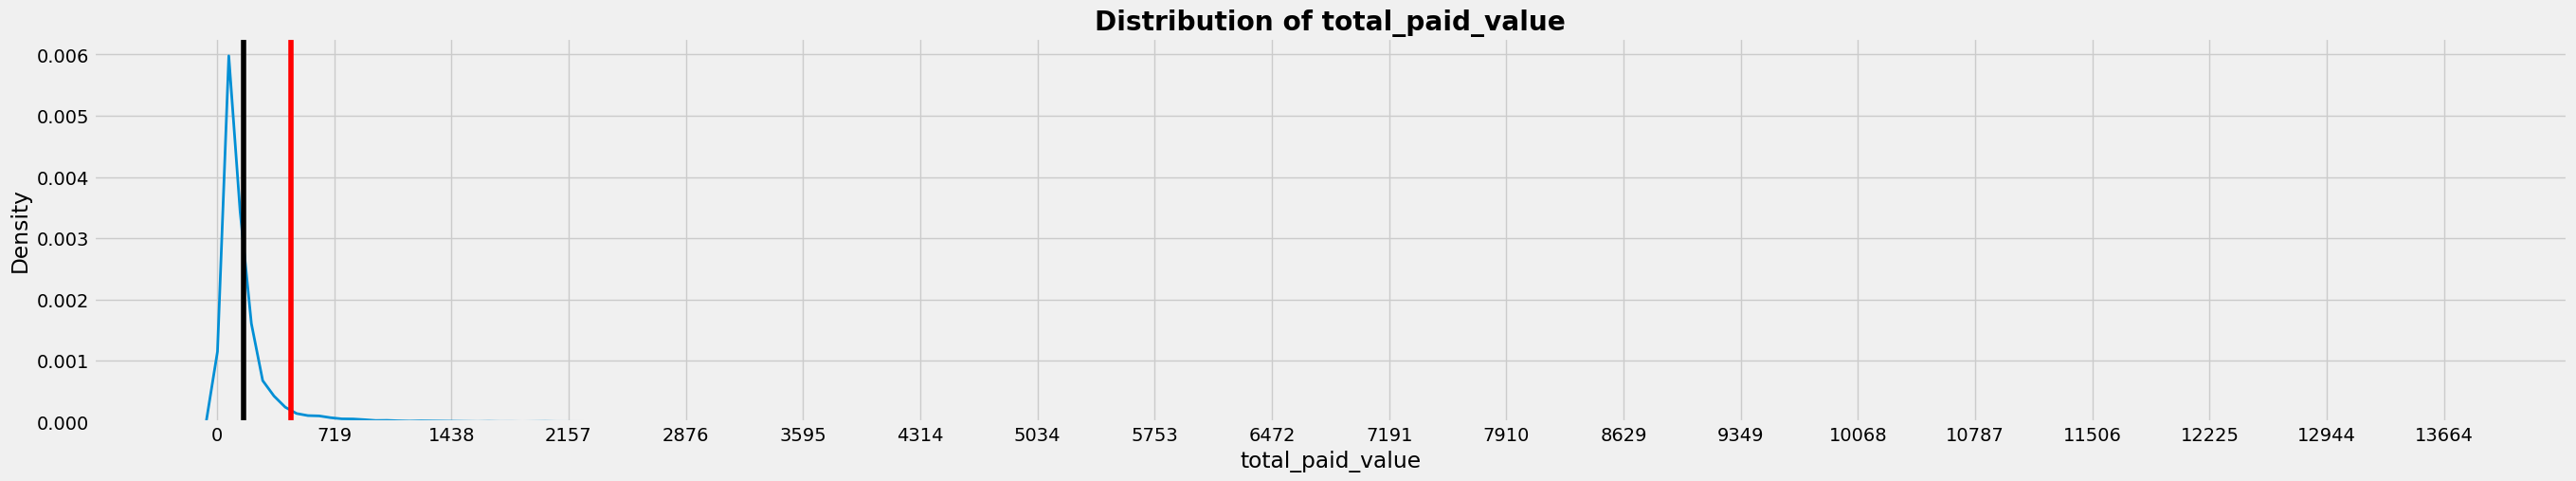

In [32]:
plt.figure(figsize=(30,5))
P.plot_kde(column= 'total_paid_value',data= data)
plt.axvline(data['total_paid_value'].mean(),color = 'black')
plt.show()

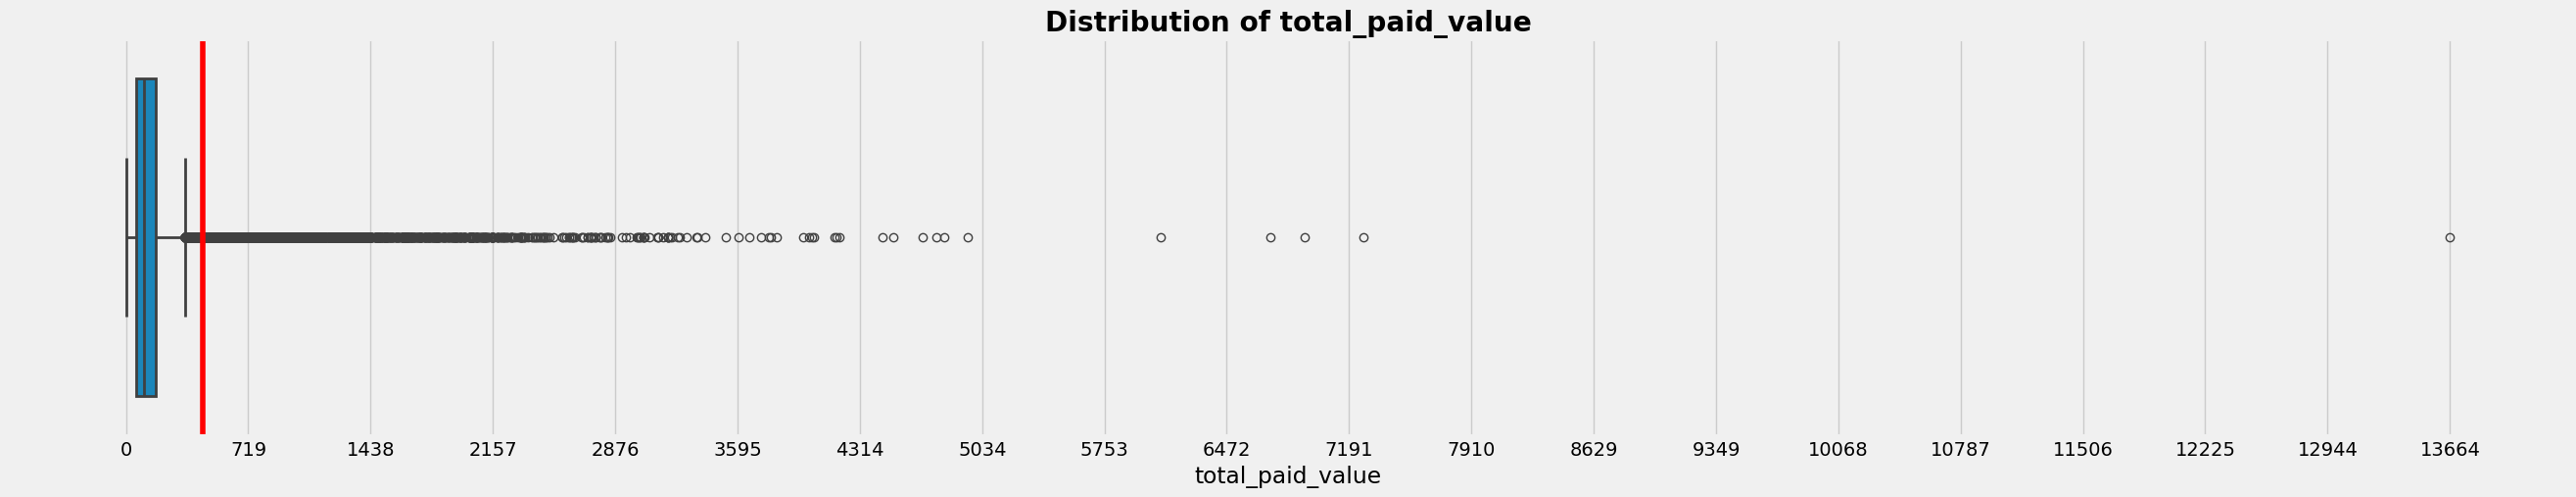

In [33]:
plt.figure(figsize=(30,5))
P.plot_box(column= 'total_paid_value',data= data)
plt.show()

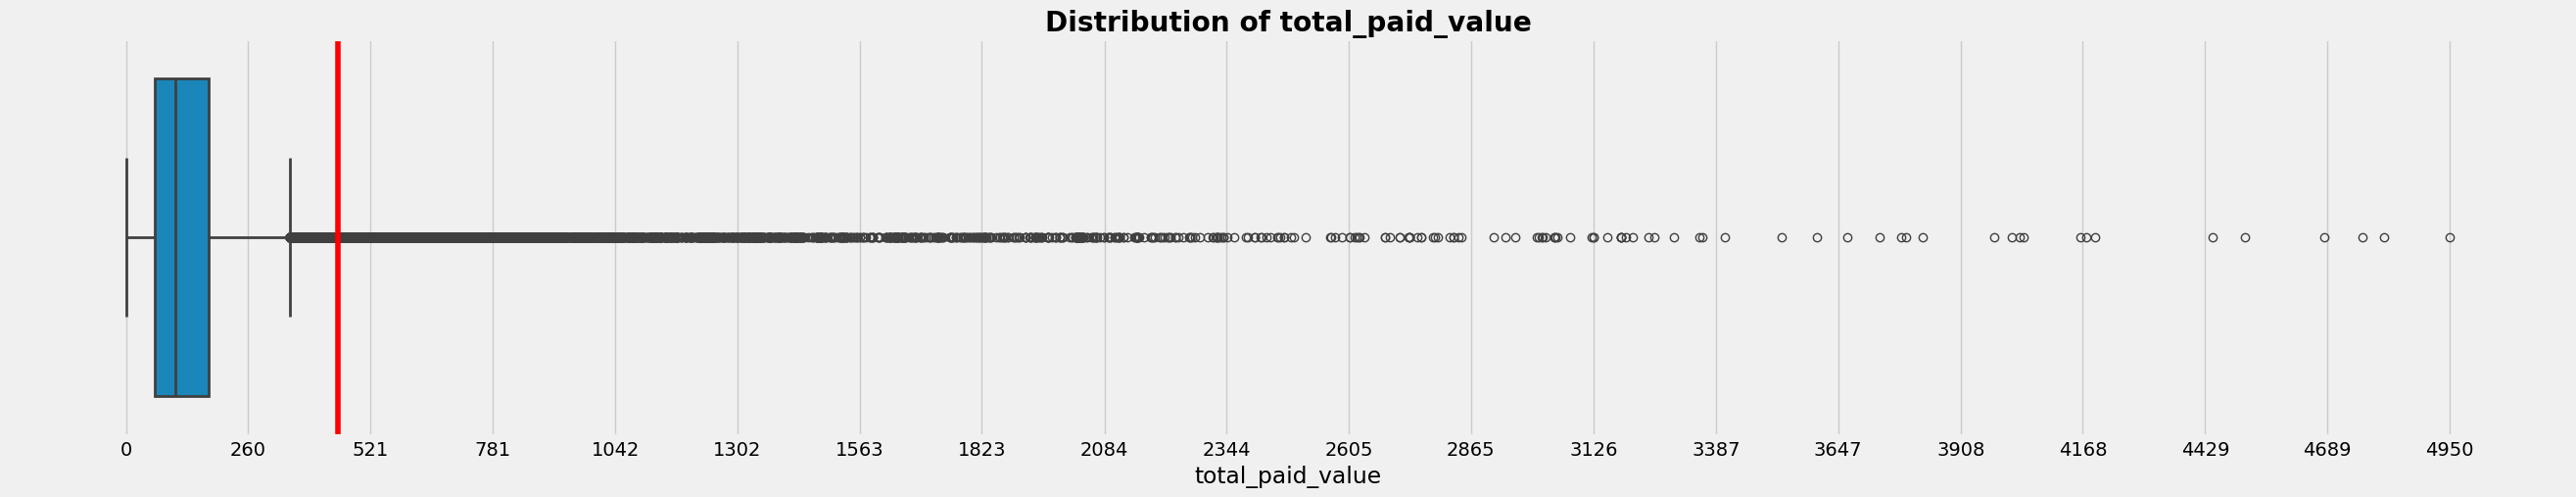

In [34]:
plt.figure(figsize=(30,5))
P.plot_box(column= 'total_paid_value',data= data[data['total_paid_value']<5000])
plt.show()

***
- **`total_paid_value` is very `skewed` towards `right`, having small sample of outliers at the higher end**
***

**approval_time**

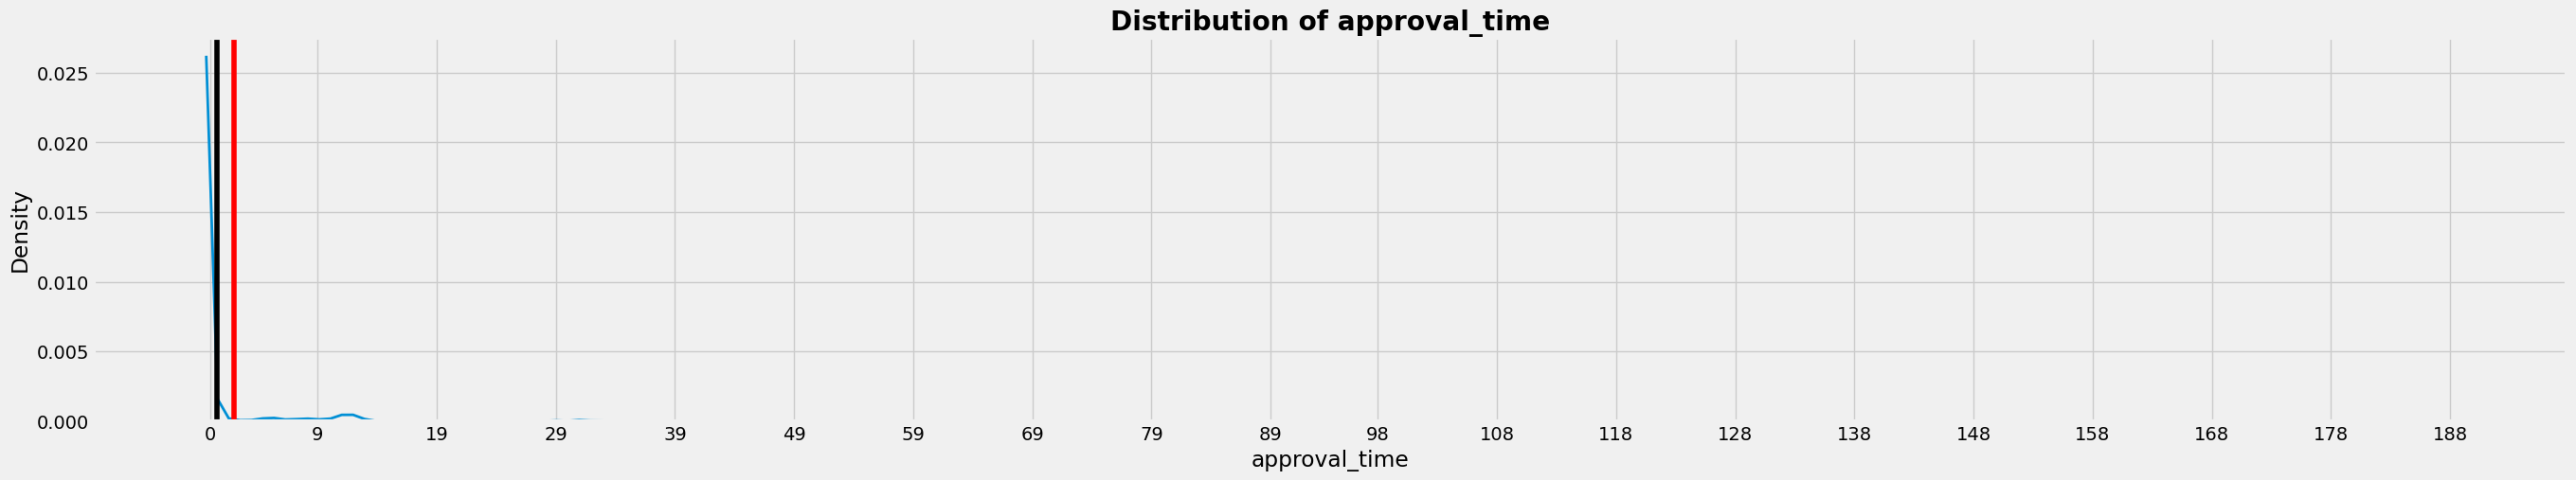

In [35]:
plt.figure(figsize=(30,5))
P.plot_kde(column= 'approval_time',data= data)
plt.axvline(data['approval_time'].mean(),color = 'black')
plt.show()

In [36]:
data.groupby('approval_time').size()

approval_time
0.0      68569
1.0      17145
2.0       9183
3.0       2256
4.0       1351
5.0        406
6.0         60
7.0         28
8.0         16
9.0          6
10.0         6
11.0        13
12.0        13
13.0         5
17.0         1
23.0         2
24.0         1
29.0         1
31.0         2
32.0         1
33.0         1
60.0         1
188.0        1
dtype: int64

In [37]:
data['approval_time']=np.where(
    data['approval_time'] == 0,'same day',
        np.where(data['approval_time']<4, 'standard',
            np.where(data['approval_time']< 13 ,'2 weeks','2 week+'
                     )
            )
)

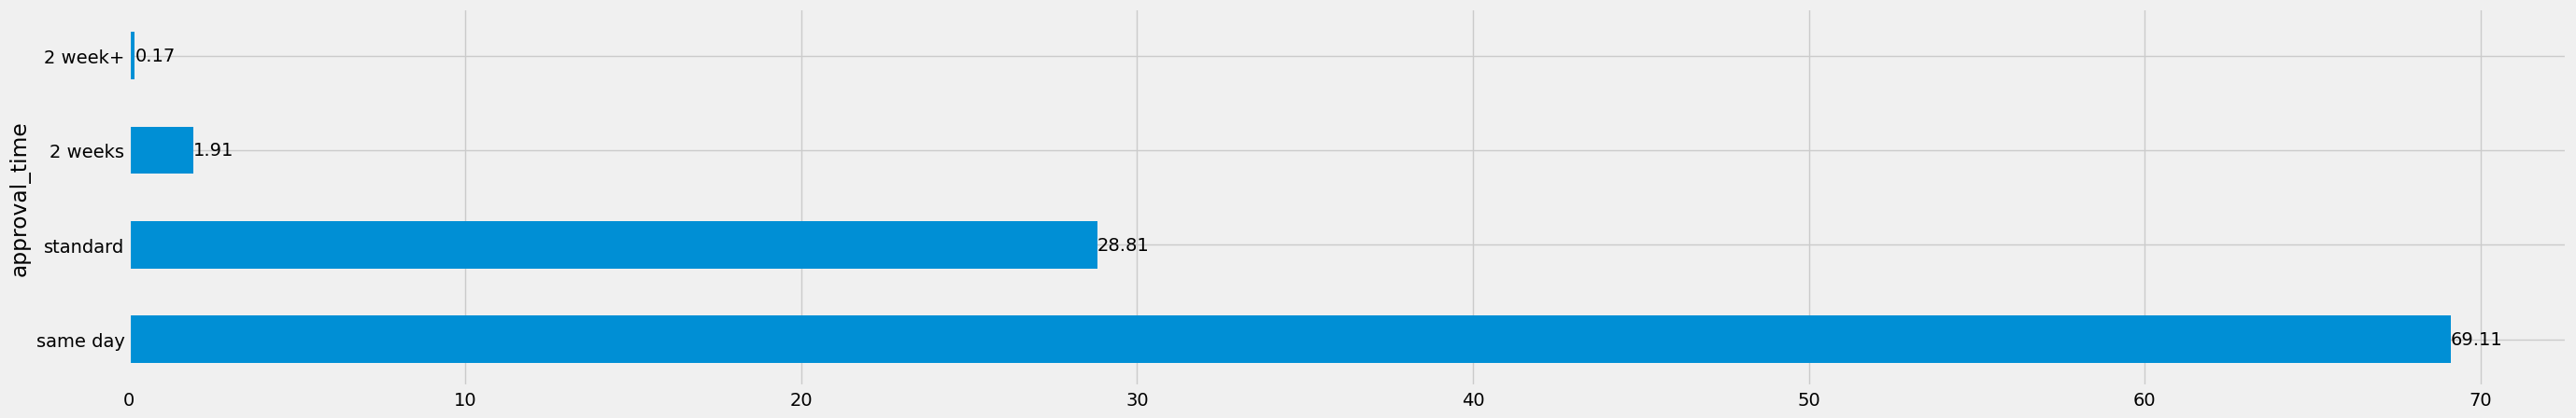

In [38]:
plt.figure(figsize=(30,5))
ax = data.groupby('approval_time').size().div(len(data)).mul(100).round(2).sort_values(ascending=False).plot(kind = 'barh')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

***
- **almost `70%` of observations include `same day` approval, only nearly `.2%` is `more than 2 weeks`**
***

**delivery_time**

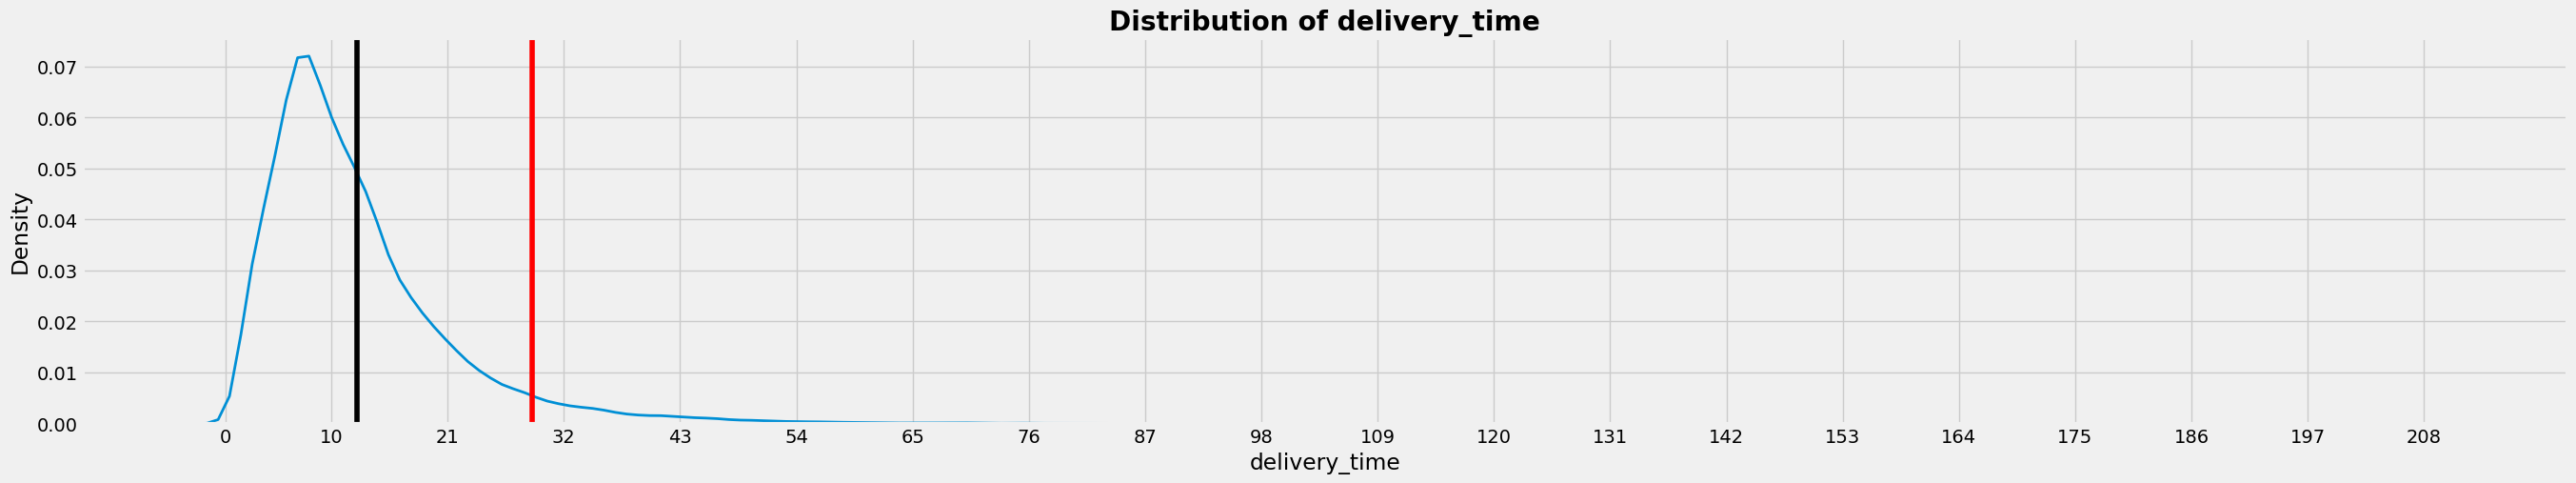

In [39]:
plt.figure(figsize=(30,5))
P.plot_kde(column= 'delivery_time',data= data)
plt.axvline(data['delivery_time'].mean(),color = 'black')
plt.show()

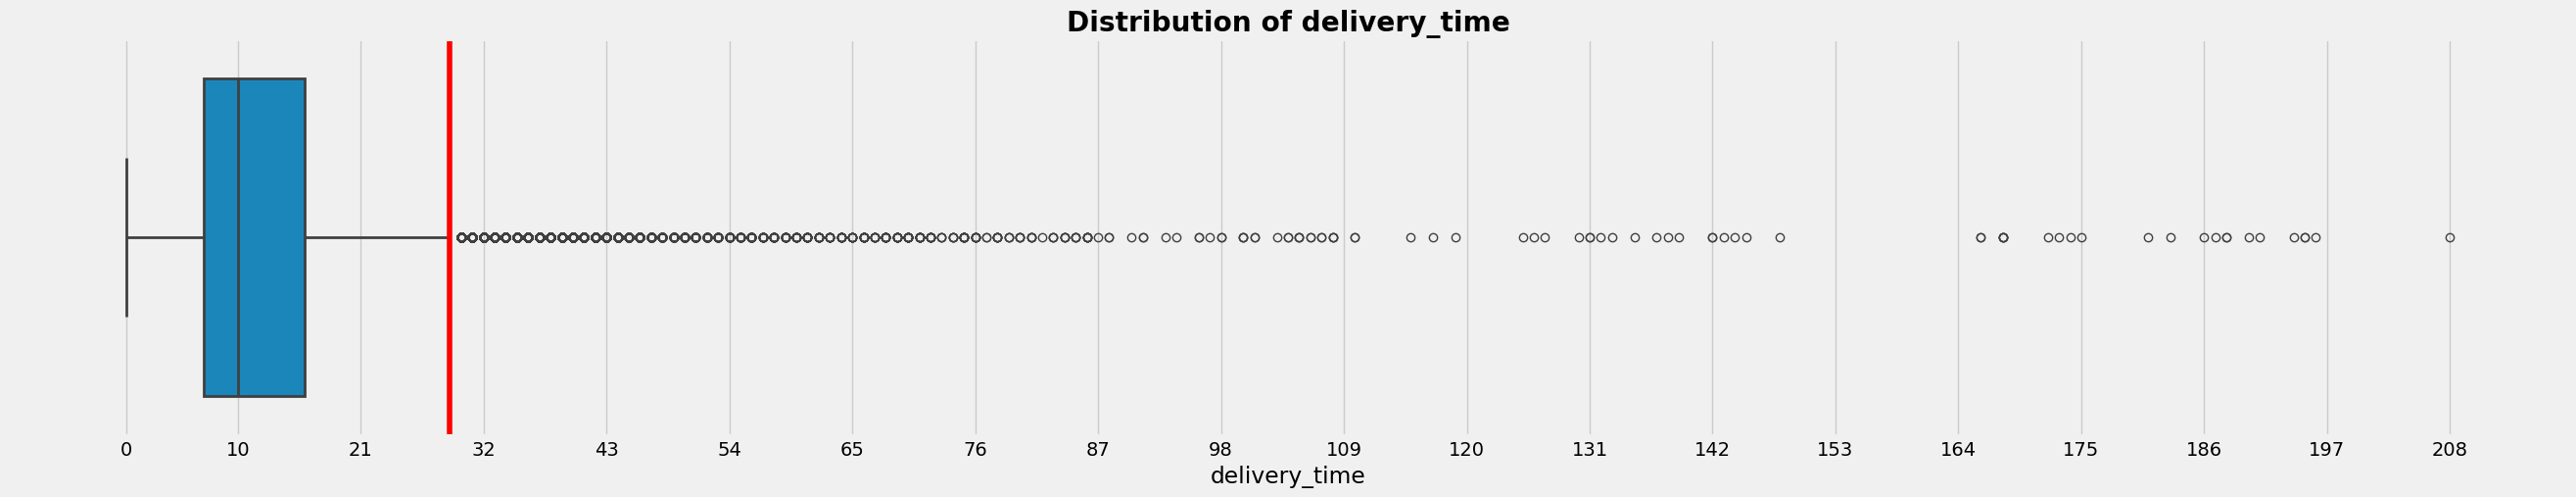

In [40]:
plt.figure(figsize=(30,5))
P.plot_box(column= 'delivery_time',data= data)
plt.show()

***
- **`delivery_time` is skewed towards right having outliers - the last 5th percentile values**

- **`delivery_time` is considered normal upto 30 days time**
***

**delivery_delay**

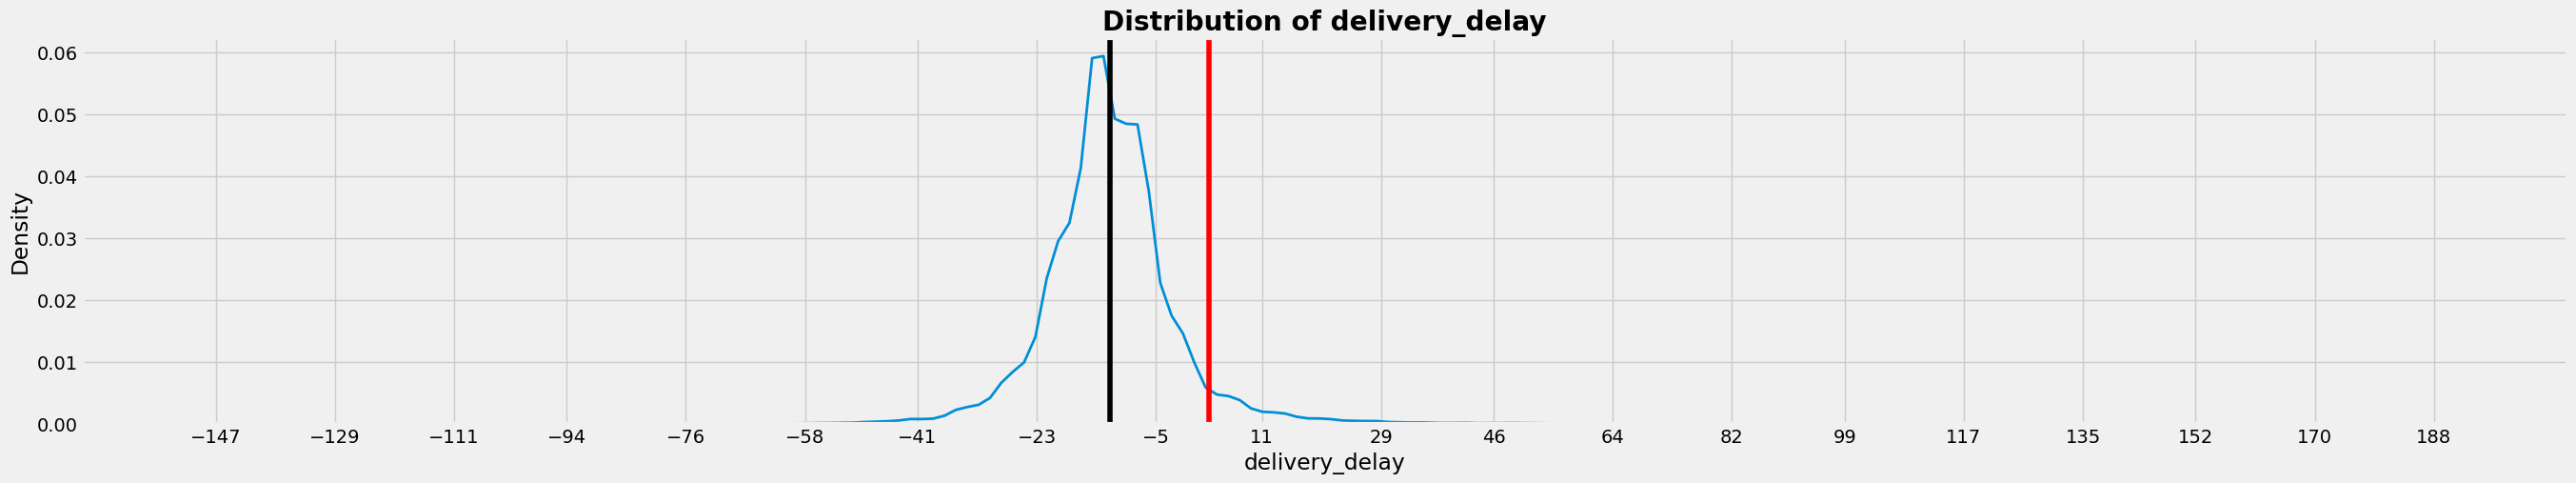

In [41]:
plt.figure(figsize=(30,5))
P.plot_kde(column= 'delivery_delay',data= data)
plt.axvline(data['delivery_delay'].mean(),color = 'black')
plt.show()

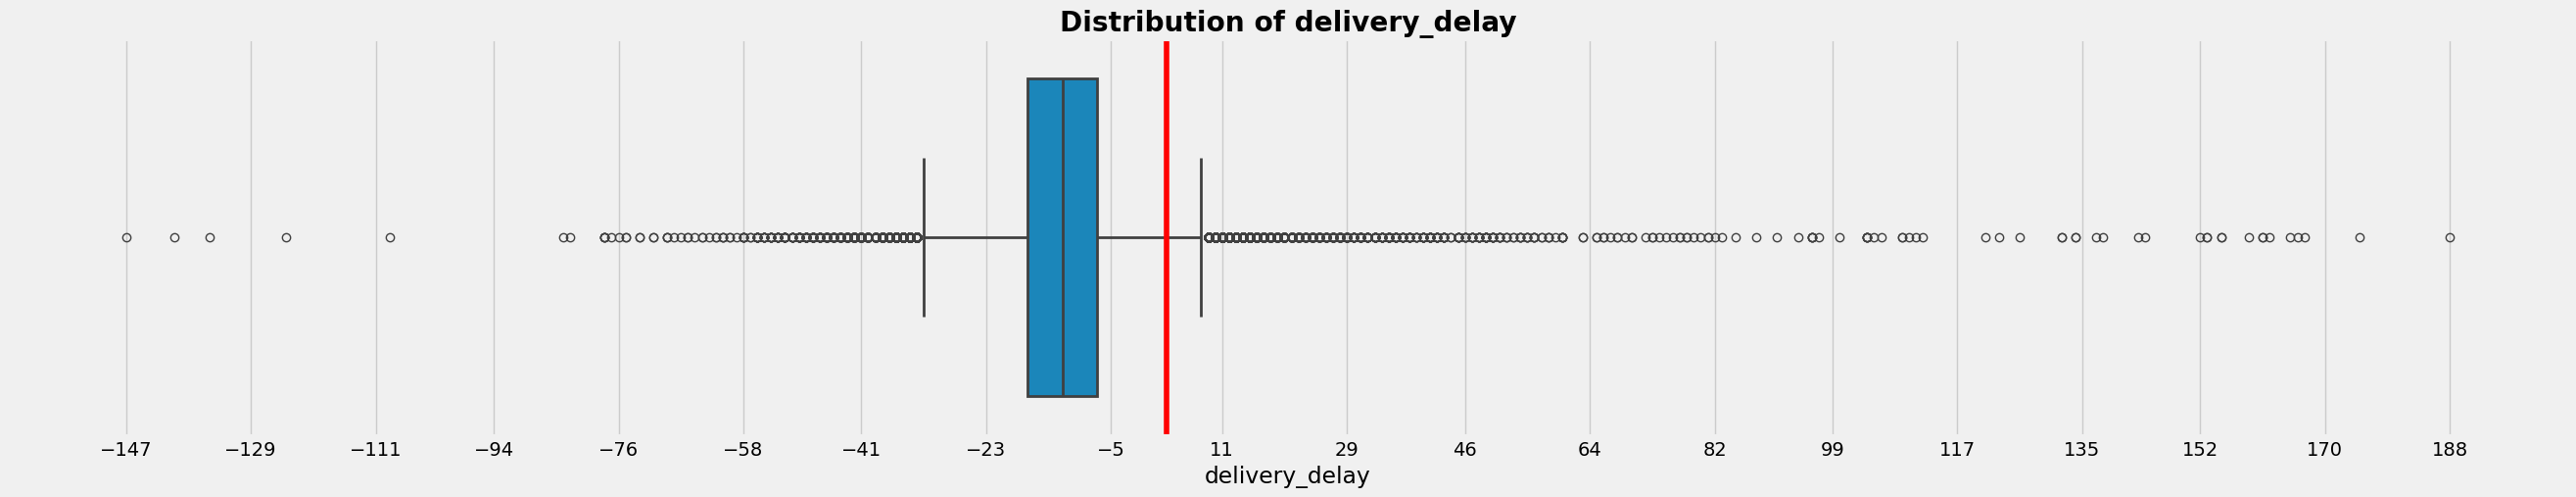

In [42]:
plt.figure(figsize=(30,5))
P.plot_box(column= 'delivery_delay',data= data)
plt.show()

***
- **`delivery_delay`mostly lies between -30 and 10 with outliers at both end**
***

**product_id**

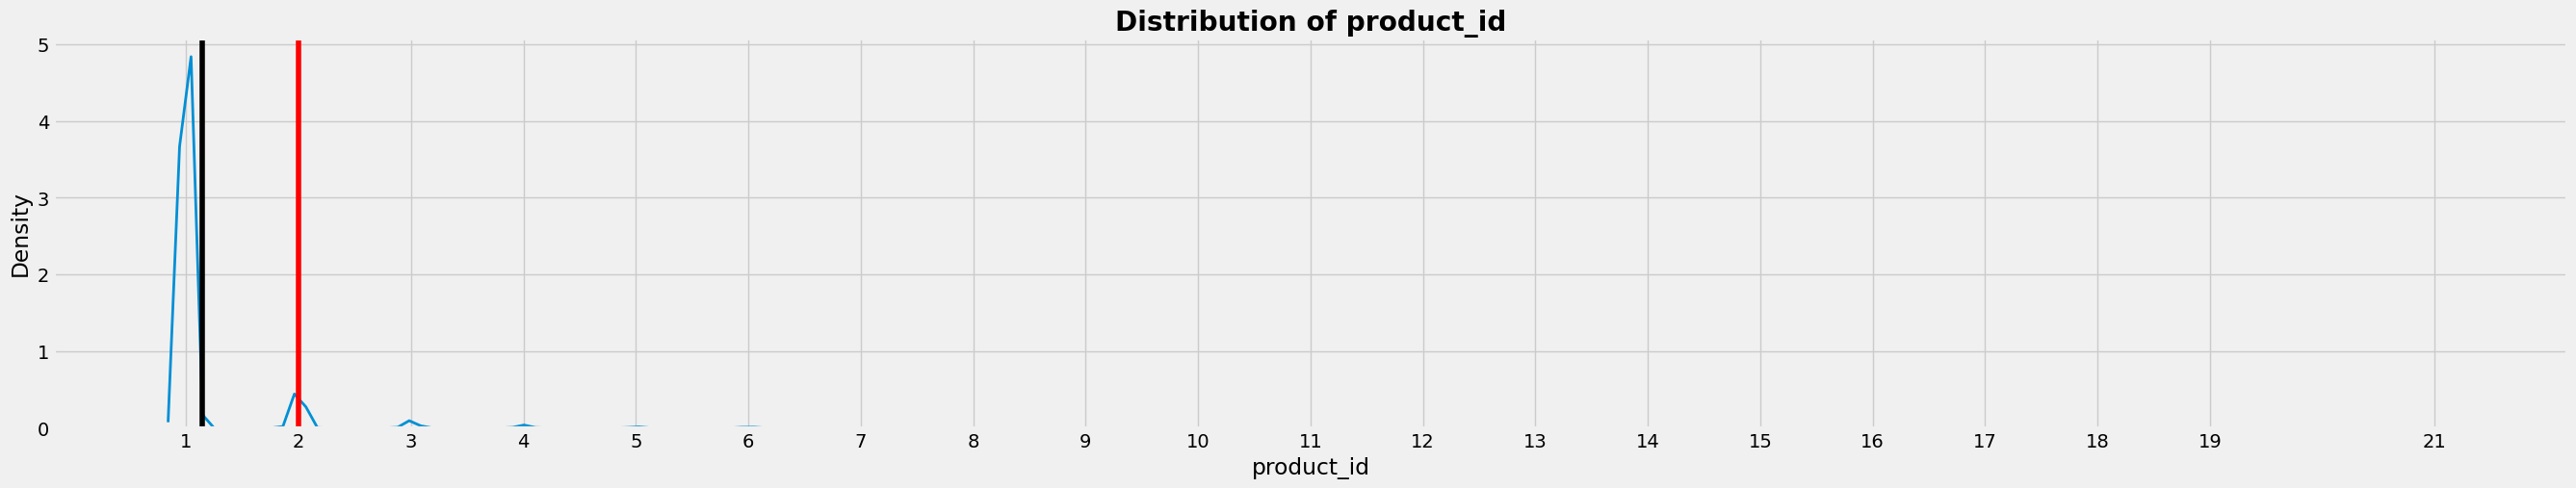

In [43]:
plt.figure(figsize=(30,5))
P.plot_kde(column= 'product_id',data= data)
plt.axvline(data['product_id'].mean(),color = 'black')
plt.show()

In [44]:
data.groupby('product_id').size()

product_id
1.0     88699
2.0      7496
3.0      1311
4.0       503
5.0       204
6.0       194
7.0        22
8.0         8
9.0         3
10.0        8
11.0        5
12.0        5
13.0        1
14.0        2
15.0        2
20.0        1
21.0        1
dtype: int64

In [45]:
def remove_product_id(data):
    if pd.isna(data):
        return 'unknown'
    else:
        if data>6:
            return '6+'
        else:
            return str(data).replace(".0","")

In [46]:
data['product_id']=data['product_id'].apply(remove_product_id)

In [47]:
data.groupby('product_id').size()

product_id
1          88699
2           7496
3           1311
4            503
5            204
6            194
6+            58
unknown      759
dtype: int64

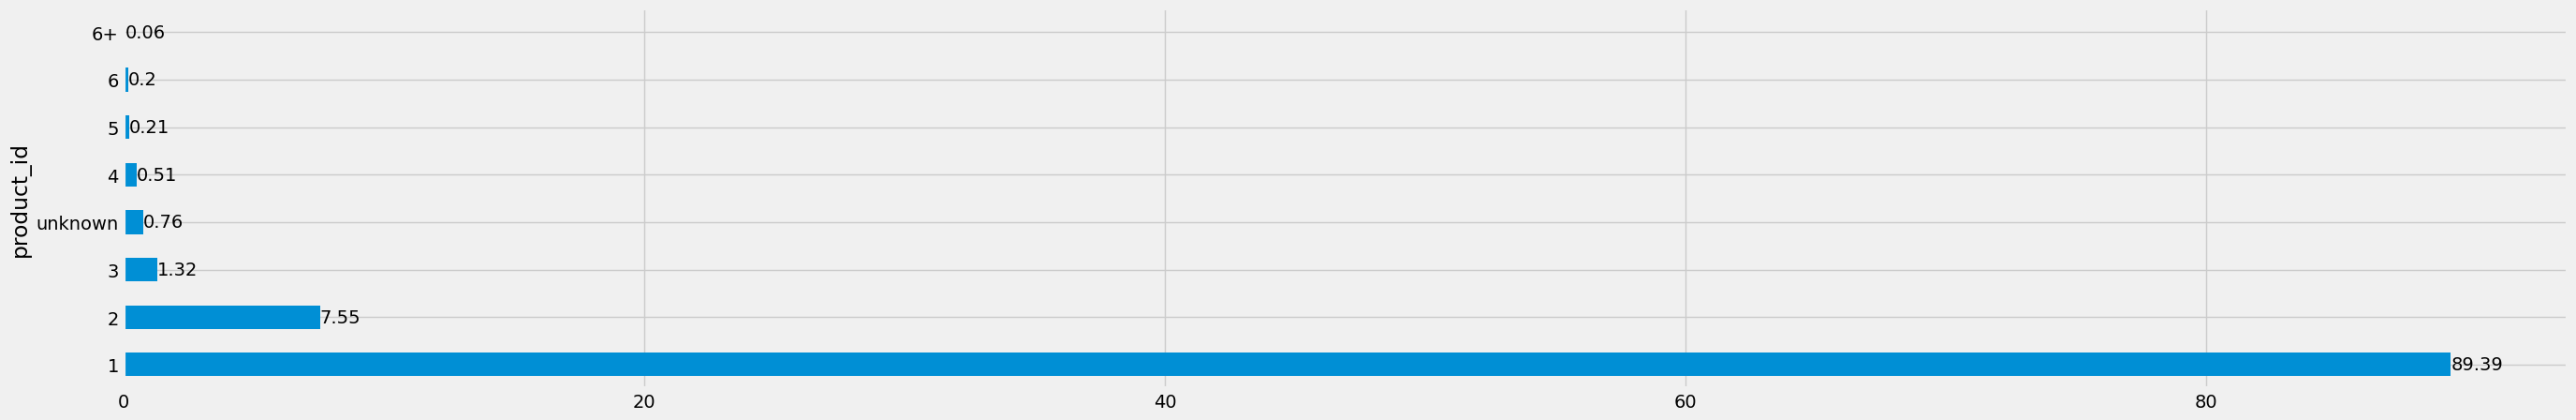

In [48]:
plt.figure(figsize=(30,5))
ax = data.groupby('product_id').size().div(len(data)).mul(100).round(2).sort_values(ascending=False).plot(kind = 'barh')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

***
- **`product_id` is mostly 1 for approx `90%` observations and nearly `0.05%` for more than `6+`**
***

**dimensional_weight**

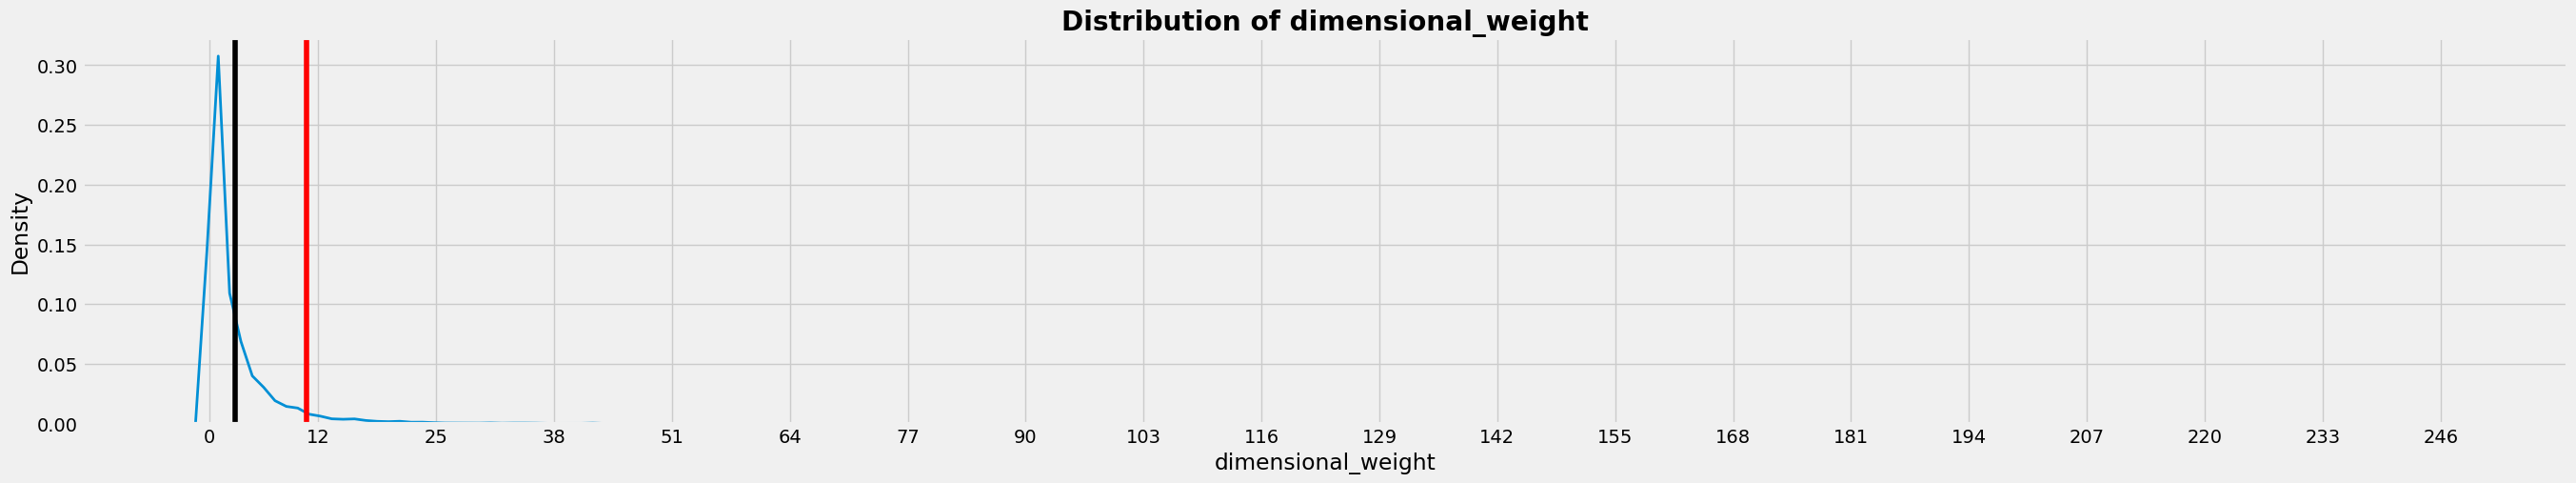

In [49]:
plt.figure(figsize=(30,5))
P.plot_kde(column= 'dimensional_weight',data= data)
plt.axvline(data['dimensional_weight'].mean(),color = 'black')
plt.show()

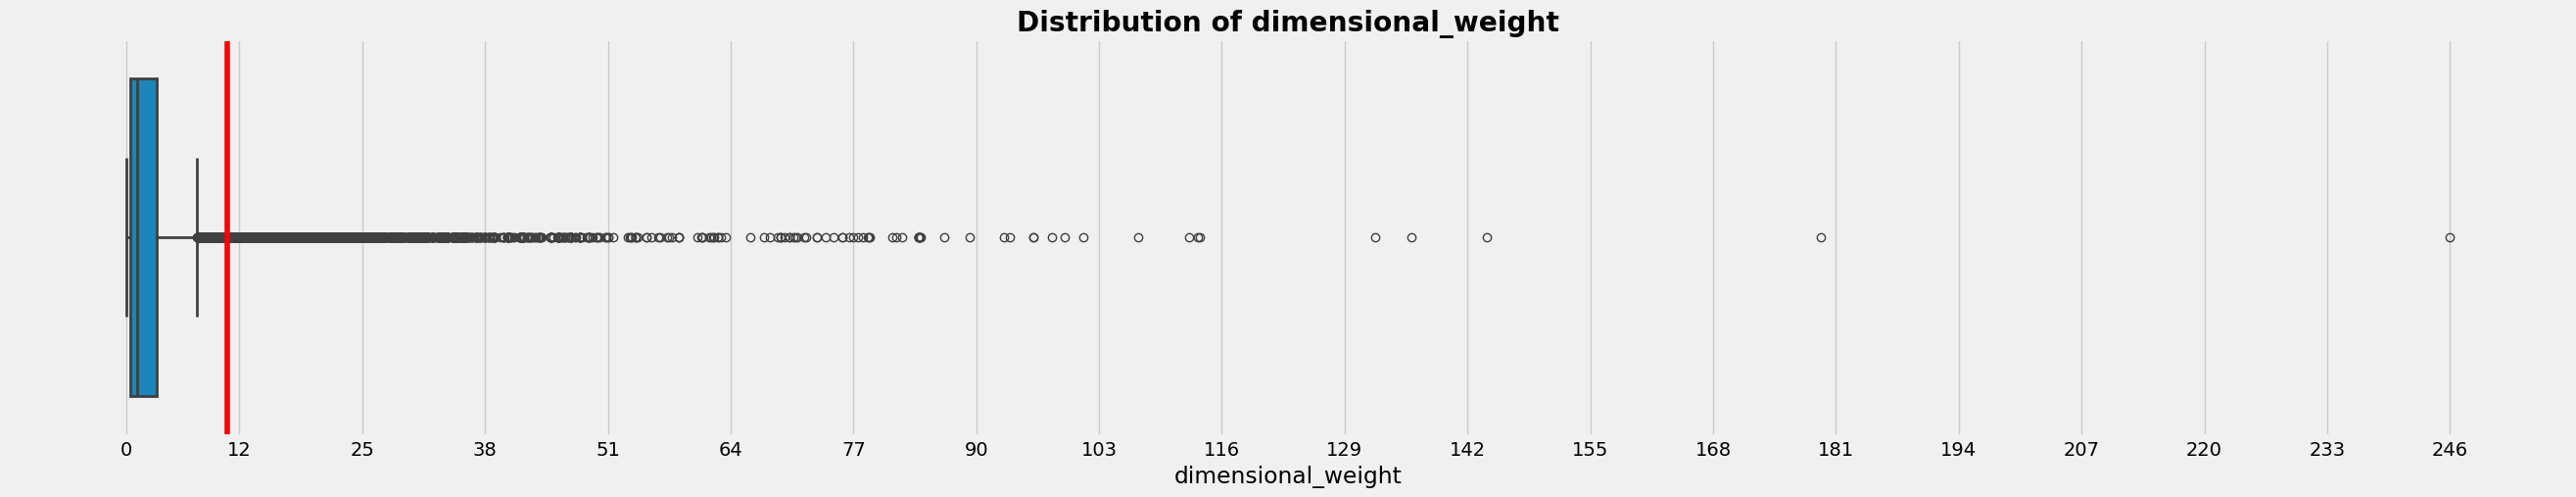

In [50]:
plt.figure(figsize=(30,5))
P.plot_box(column= 'dimensional_weight',data= data)
plt.show()

***
- **`dimensional_weight` is skewed towards right, having outliers at higher end**
***

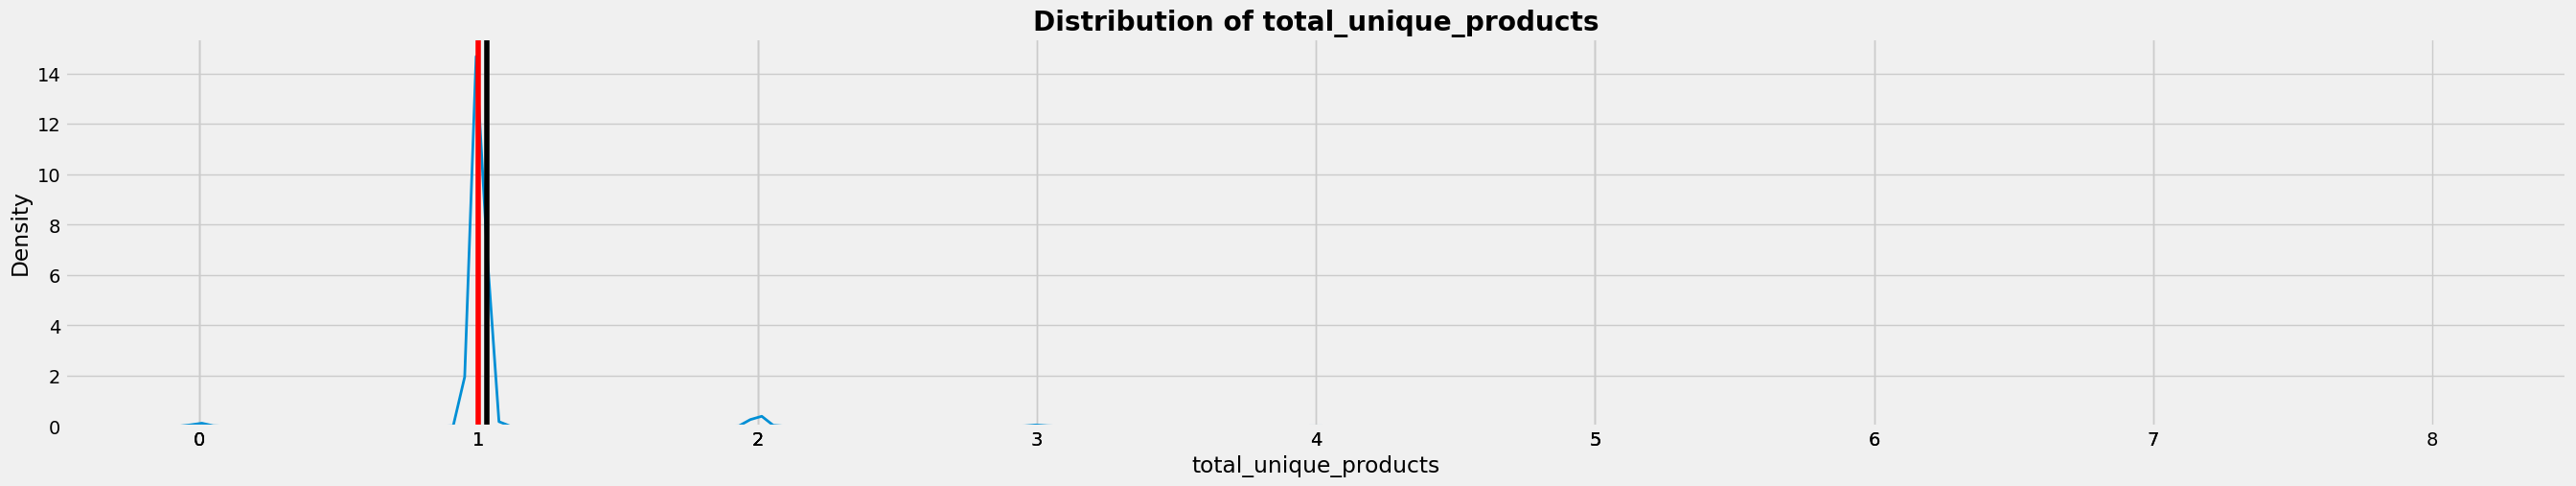

In [51]:
plt.figure(figsize=(30,5))
P.plot_kde(column= 'total_unique_products',data= data)
plt.axvline(data['total_unique_products'].mean(),color = 'black')
plt.show()

In [52]:
data.groupby('total_unique_products').size()

total_unique_products
0      759
1    95227
2     2847
3      298
4       70
5        8
6       11
7        3
8        1
dtype: int64

In [53]:
def remove_unique_products(data):
    if data == 0:
        return 'unknown'
    elif data>3:
        return "3+"
    else:
        return str(int(data))

In [54]:
data['total_unique_products']=data['total_unique_products'].apply(remove_unique_products)

### **Target Column**

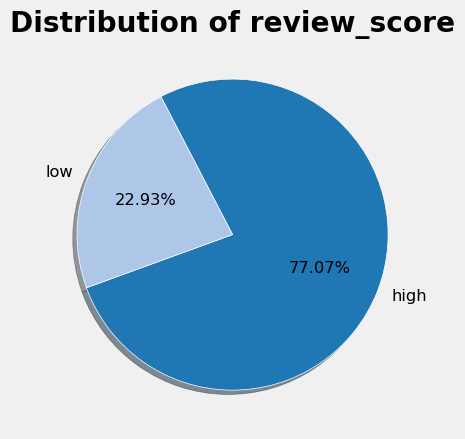

In [55]:
P.plot_pie(column='review_score',data=data)

### **Statistical Insight from target column**

- **approx 77% of total reviews are high**

In [56]:
data.select_dtypes(include='number').nunique().reset_index(name = 'total_unique_values')

,index,total_unique_values
0,avg_price,1059
1,avg_freight,233
2,is_multiple_seller,2
3,payment_type_used,3
4,total_paid_value,27637
5,delivery_time,141
6,delivery_delay,196
7,product_category_name,4
8,dimensional_weight,2338


In [57]:
data.select_dtypes(include='number').columns

Index(['avg_price', 'avg_freight', 'is_multiple_seller', 'payment_type_used',
       'total_paid_value', 'delivery_time', 'delivery_delay',
       'product_category_name', 'dimensional_weight'],
      dtype='object')

In [58]:
data.select_dtypes(include='object').nunique().reset_index(name = 'total_unique_values')

,index,total_unique_values
0,review_score,2
1,review_creation_date,636
2,total_unique_products,5
3,total_products,8
4,max_attempt,4
5,installment_duration,11
6,order_status,8
7,approval_time,4
8,product_id,8


In [59]:
cat_cols = ['is_multiple_seller','payment_type_used','product_category_name','total_unique_products','total_products','max_attempt','installment_duration','order_status','approval_time','product_id']

In [60]:
num_cols = [ 'avg_price','avg_freight','total_paid_value','delivery_time', 'delivery_delay', 'dimensional_weight']

In [61]:
target_col = ['review_score']

***

## ***Bivariate Analysis with `review_score` column***

### **Categorical Columns with target**

**is_multiple_seller**

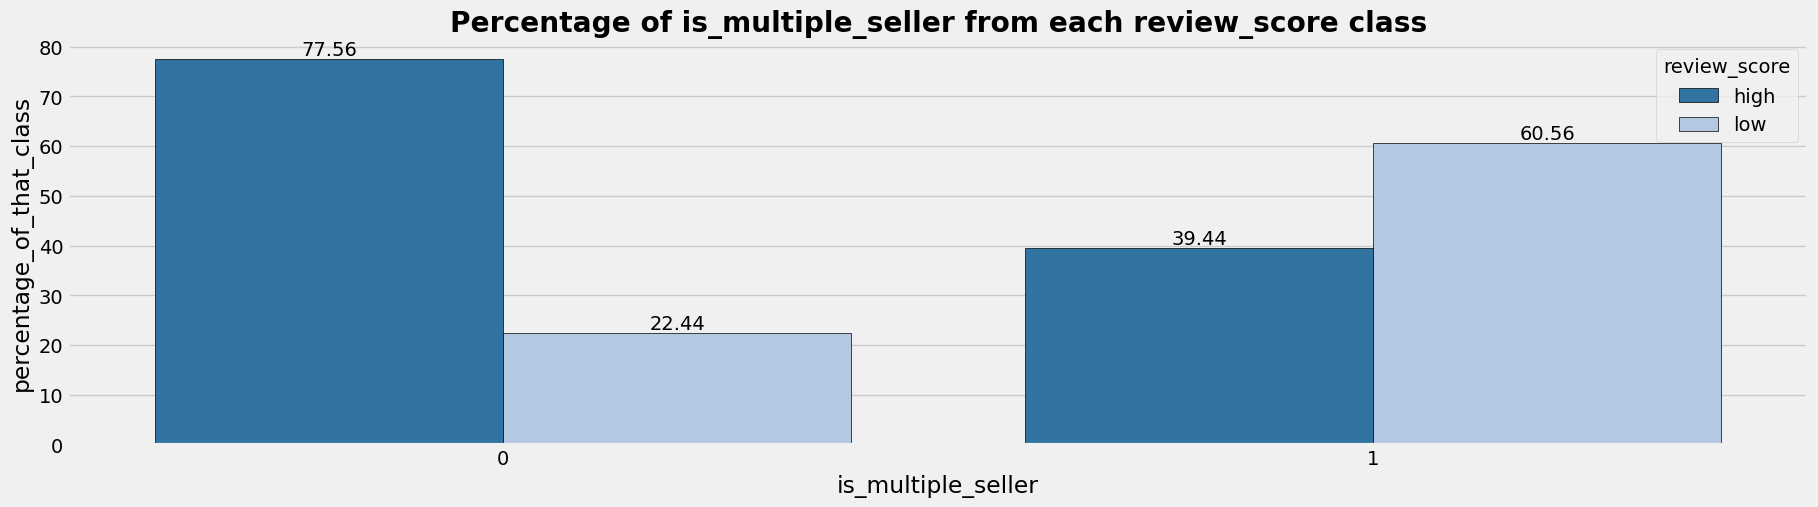

In [62]:
plt.figure(figsize=(20,5))
P.percentage_in_that_class(column='is_multiple_seller',data=data,target='review_score',orient='v')

In [63]:
ct = pd.crosstab(data['is_multiple_seller'],data['review_score'])

S.chi_sqared_test(ct)

Chi-square p-value: 0.00000
Reject null (groups different)
Cramer's V: 0.102 → Moderate


***
- **according to the visuals, we get to see that - `low review score is more frequent in orders where multiple sellers were used`, after doing statistical test we can validate a moderate relationship between `is_multiple_seller` and `review_score`**
***

**payment_type_used**

In [64]:
data.groupby('payment_type_used')['review_score'].size()

payment_type_used
0        1
1    96984
2     2239
Name: review_score, dtype: int64

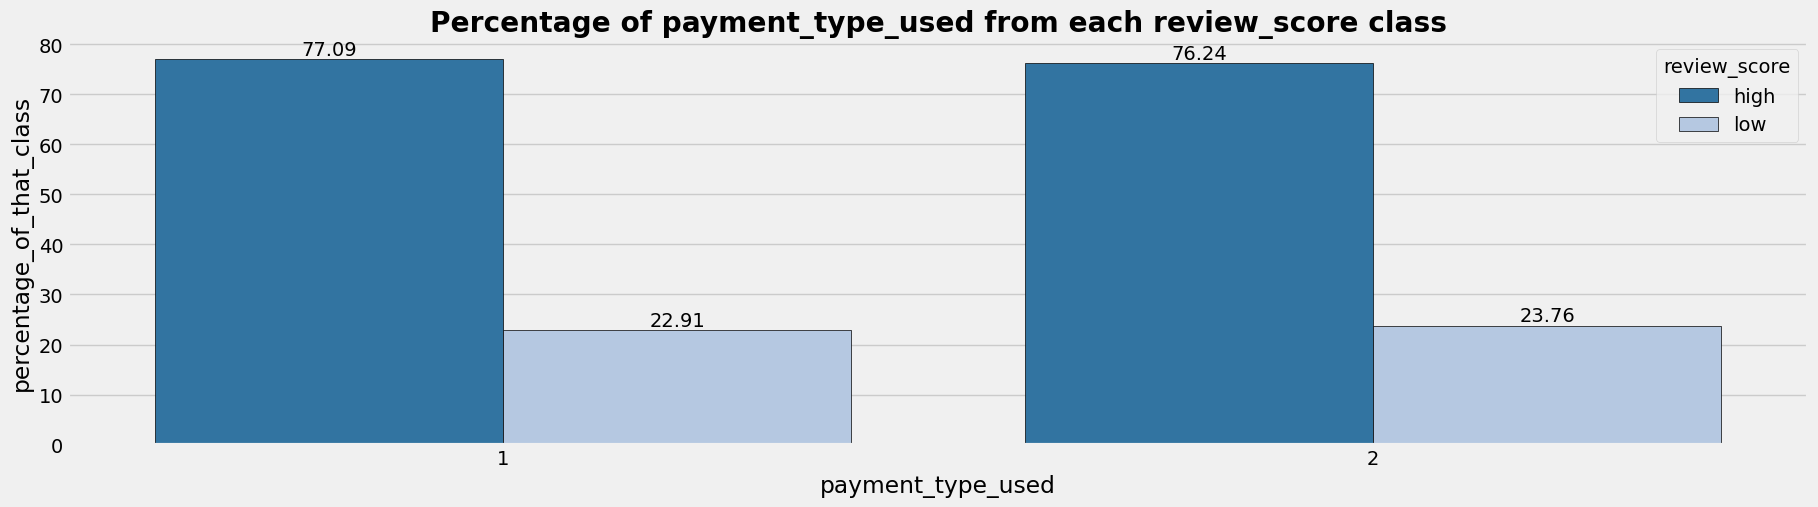

In [65]:
temp = data[data['payment_type_used'] != 0]
plt.figure(figsize=(20,5))
P.percentage_in_that_class(column='payment_type_used',data=temp,target='review_score',orient='v')

- **we dont see any stron pattern between number of payment_types_used and review_score**

**order_status**

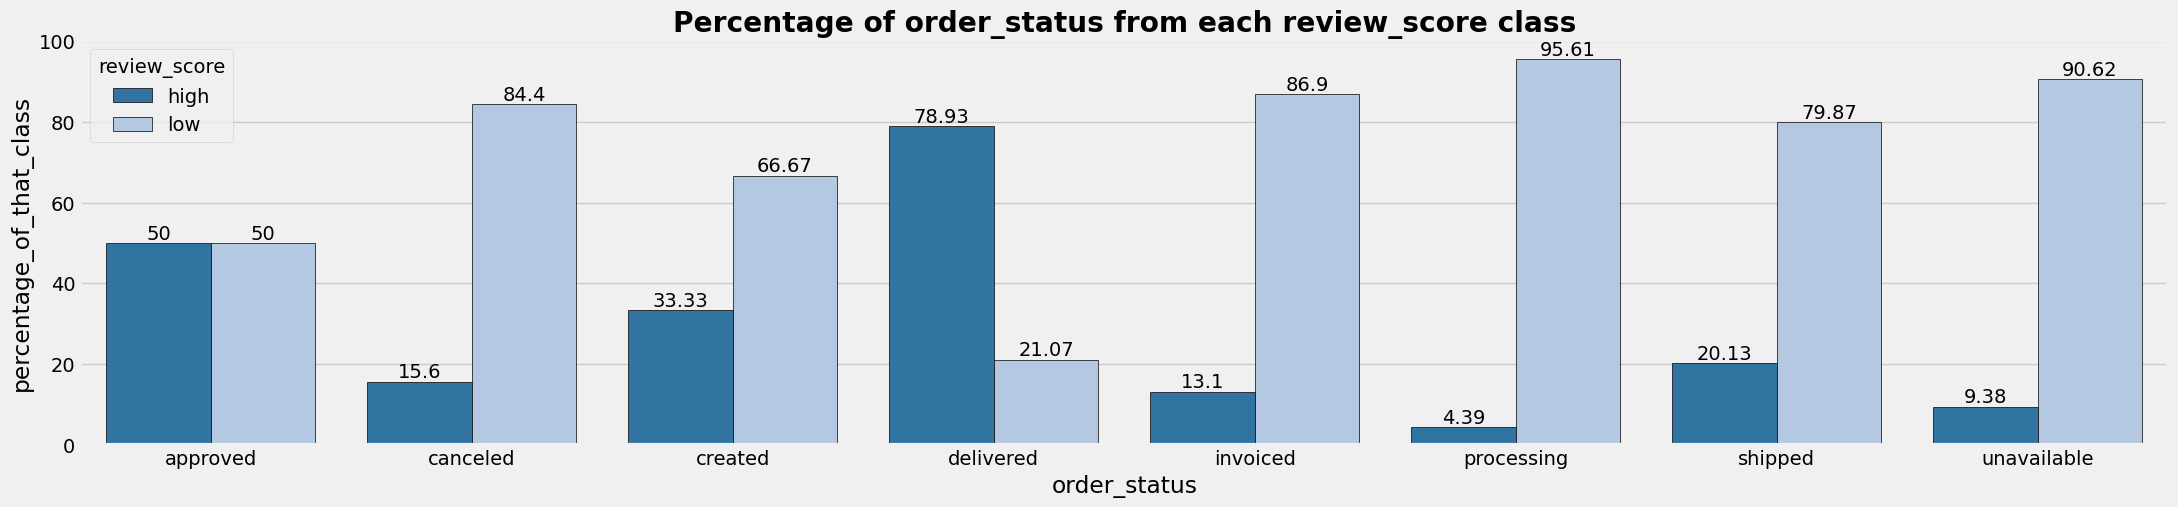

In [66]:
plt.figure(figsize=(24,5))
P.percentage_in_that_class(column='order_status',data=data,target='review_score',orient='v')

In [67]:
order_status_mask = (data['order_status']=='delivered')
ct = pd.crosstab(order_status_mask,data['review_score'])

S.chi_sqared_test(ct)

Chi-square p-value: 0.00000
Reject null (groups different)
Cramer's V: 0.256 → Moderate


***
- **from visuals we saw that `only delivered products have good review_score`, after doing statistical test we can confirm that the fact is true with moderate strength**
***

**total_unique_products**

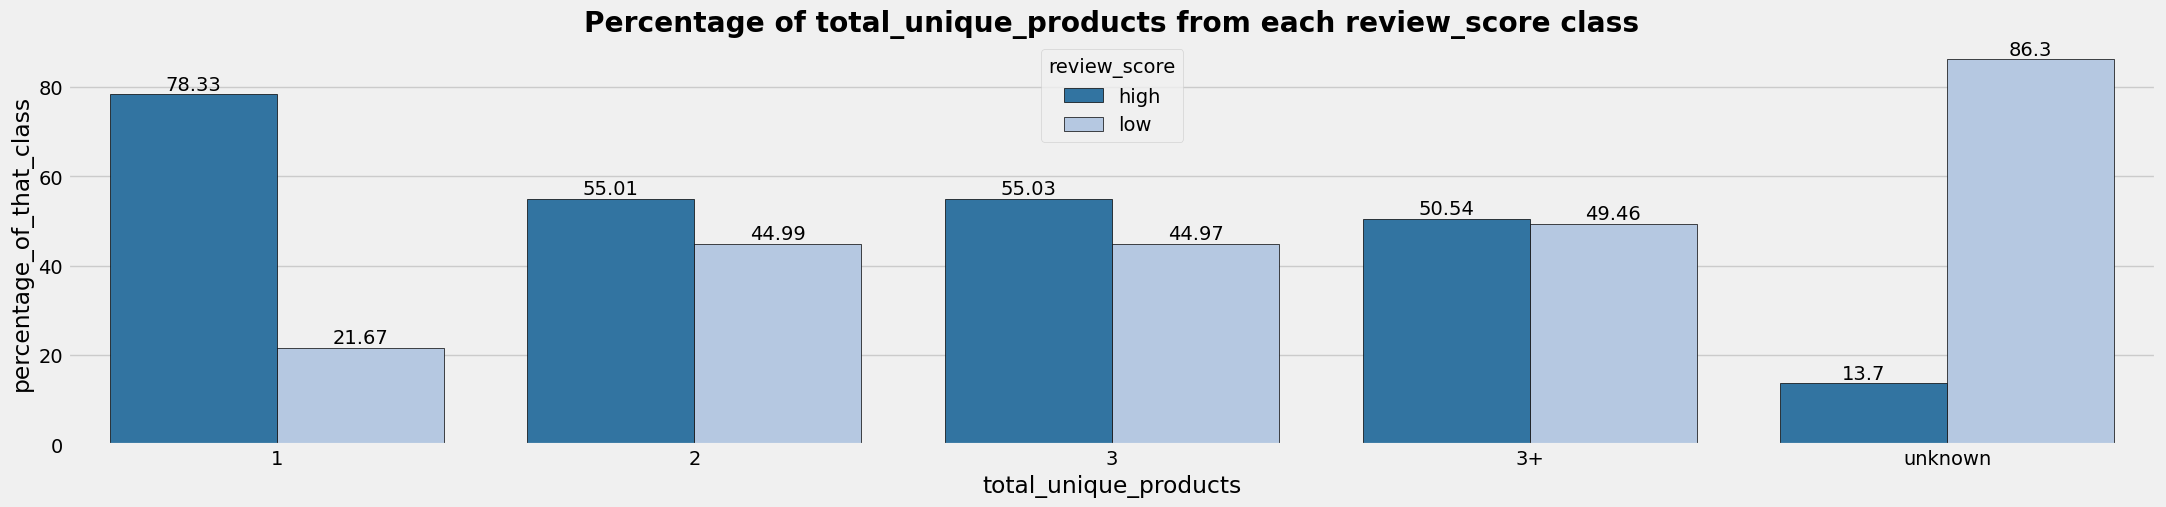

In [68]:
plt.figure(figsize=(24,5))
P.percentage_in_that_class(column='total_unique_products',data=data,target='review_score',orient='v')

In [69]:
total_unique_product_mask = (data['total_unique_products']=='unknown')
ct = pd.crosstab(total_unique_product_mask,data['review_score'])

S.chi_sqared_test(ct)

Chi-square p-value: 0.00000
Reject null (groups different)
Cramer's V: 0.132 → Moderate


***
- **from visuals I saw that,` unknown total_unique_products showed highest amount of low rating score`, after doing statistical test we can validate this with moderate relationship**
***

**avg_price**

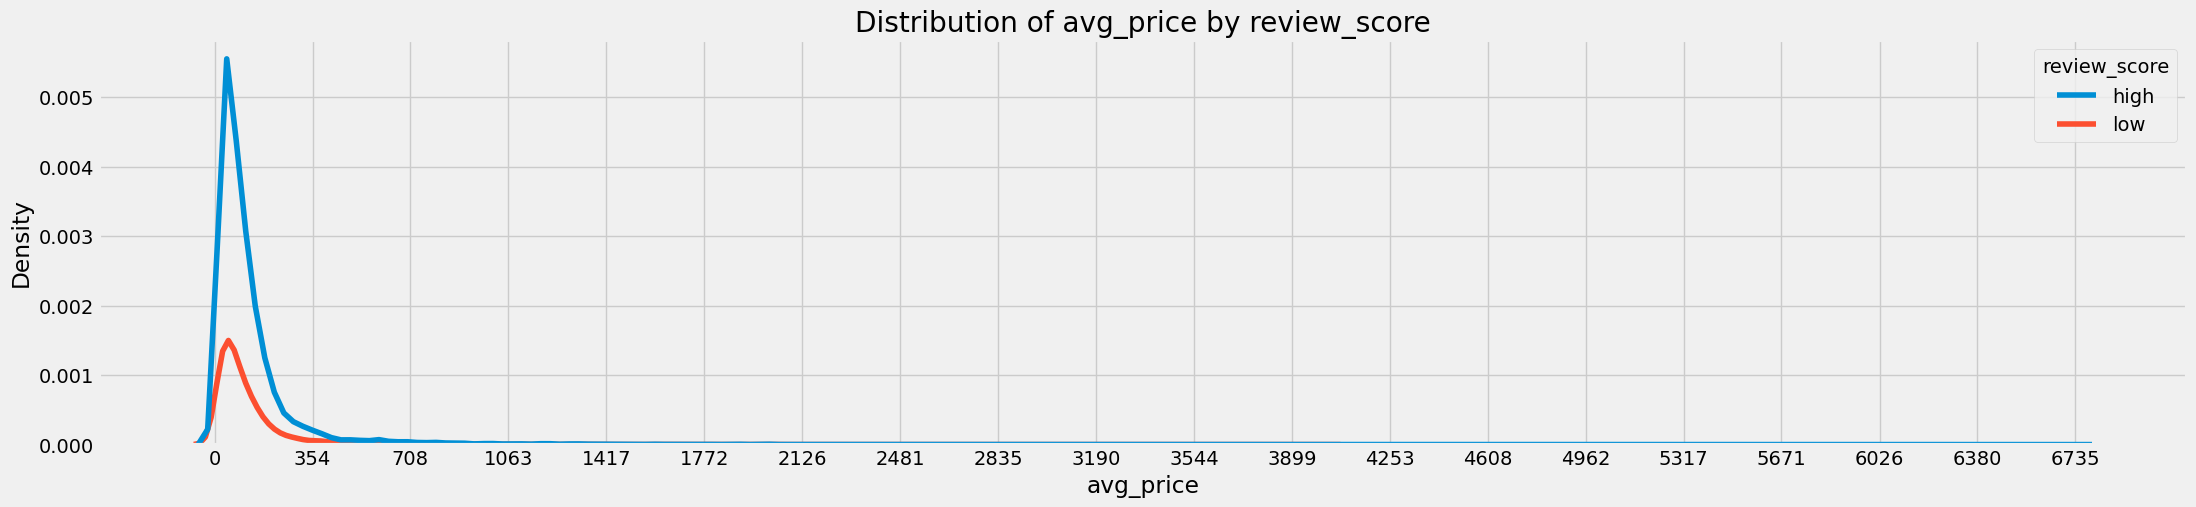

In [70]:
plt.figure(figsize=(24,5))
P.kde_in_all_class(column='avg_price',data= data,target='review_score')

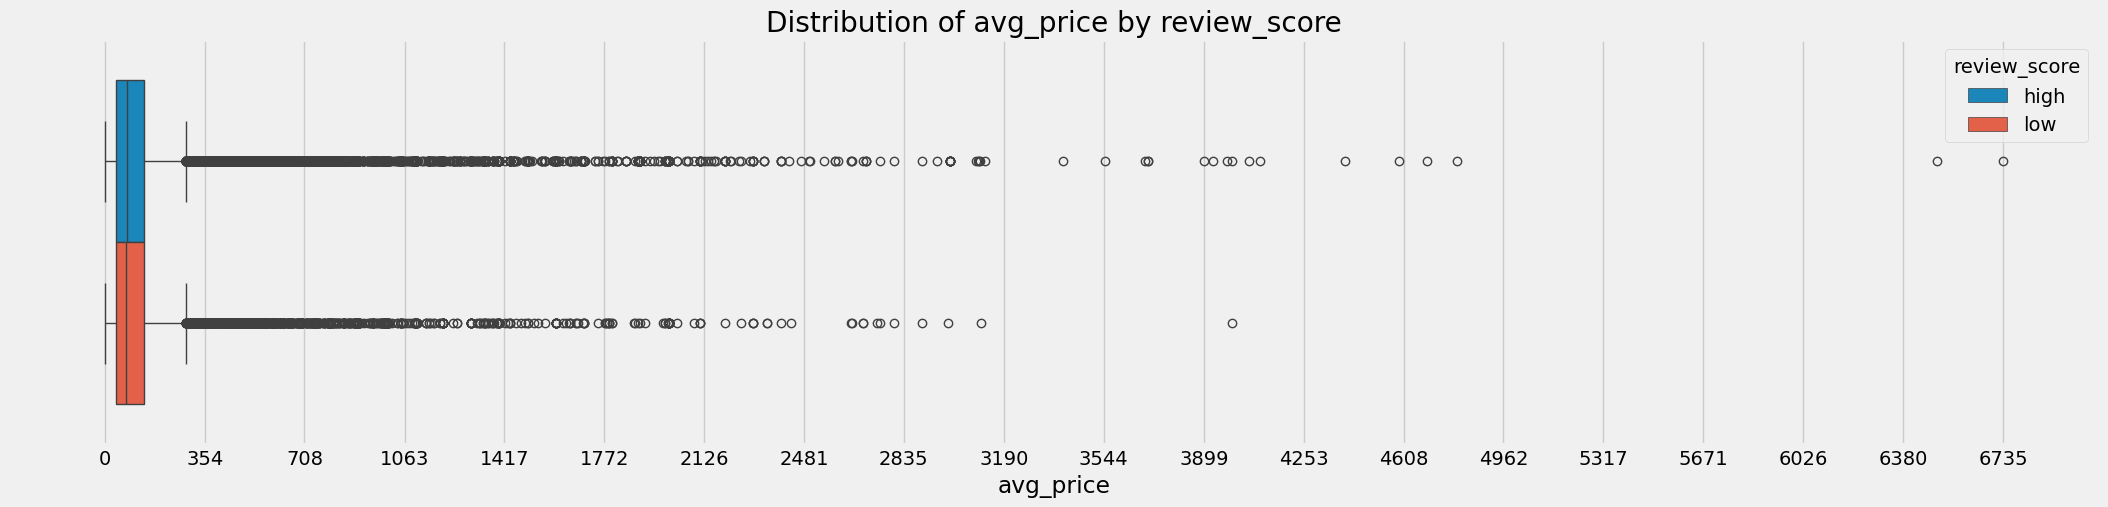

In [71]:
plt.figure(figsize=(24,5))
P.box_in_all_class(column='avg_price',data= data,target='review_score')

In [72]:
data.groupby('review_score')['avg_price'].describe().round(2).T

review_score,high,low
count,76470.00,22754.00
mean,124.89,123.76
std,189.31,187.62
min,0.00,0.00
25%,41.00,40.00
50%,79.00,76.00
75%,140.00,139.00
max,6735.00,3999.00


**we do not see anything difference in avg price in both high and low review_score**

**avg_freight**

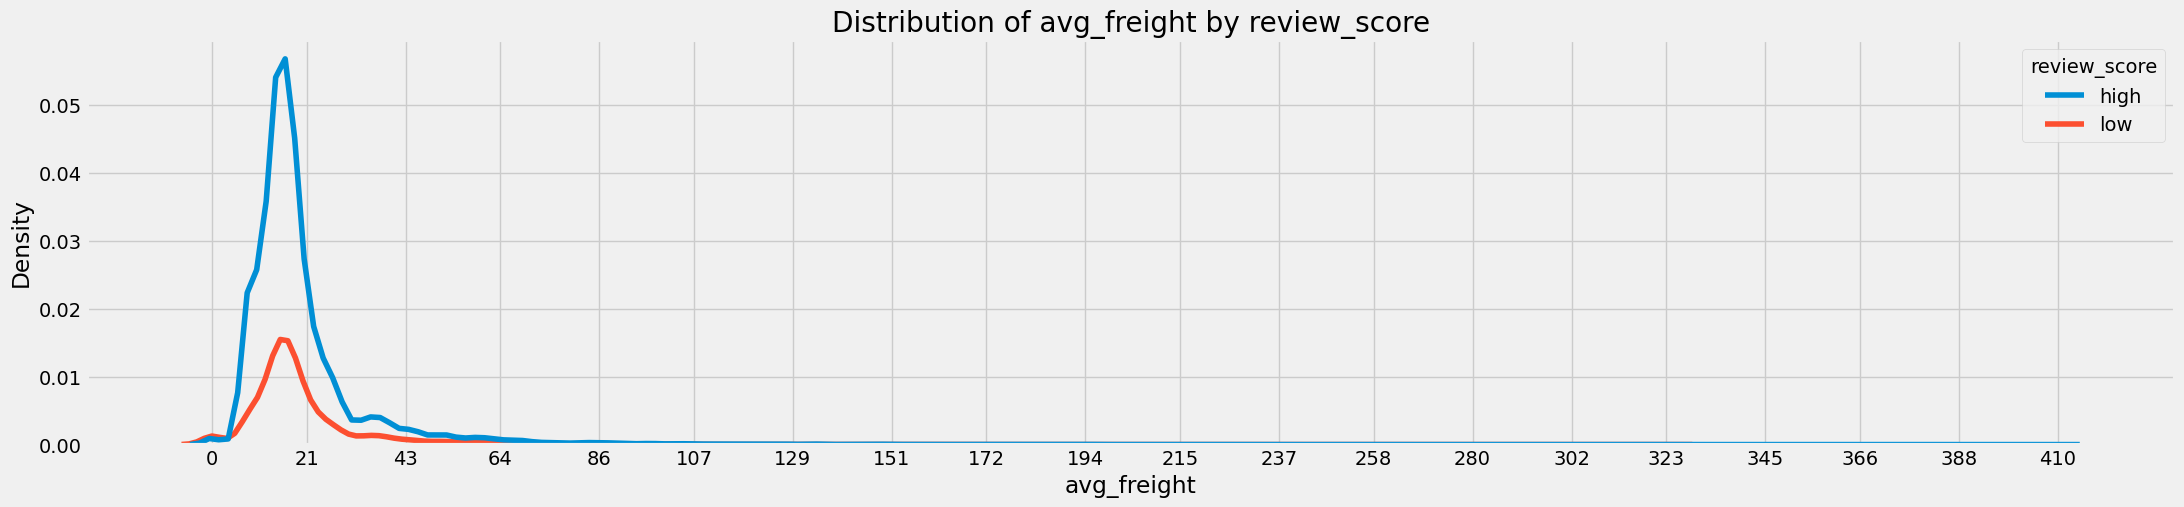

In [73]:
plt.figure(figsize=(24,5))
P.kde_in_all_class(column='avg_freight',data= data,target='review_score')

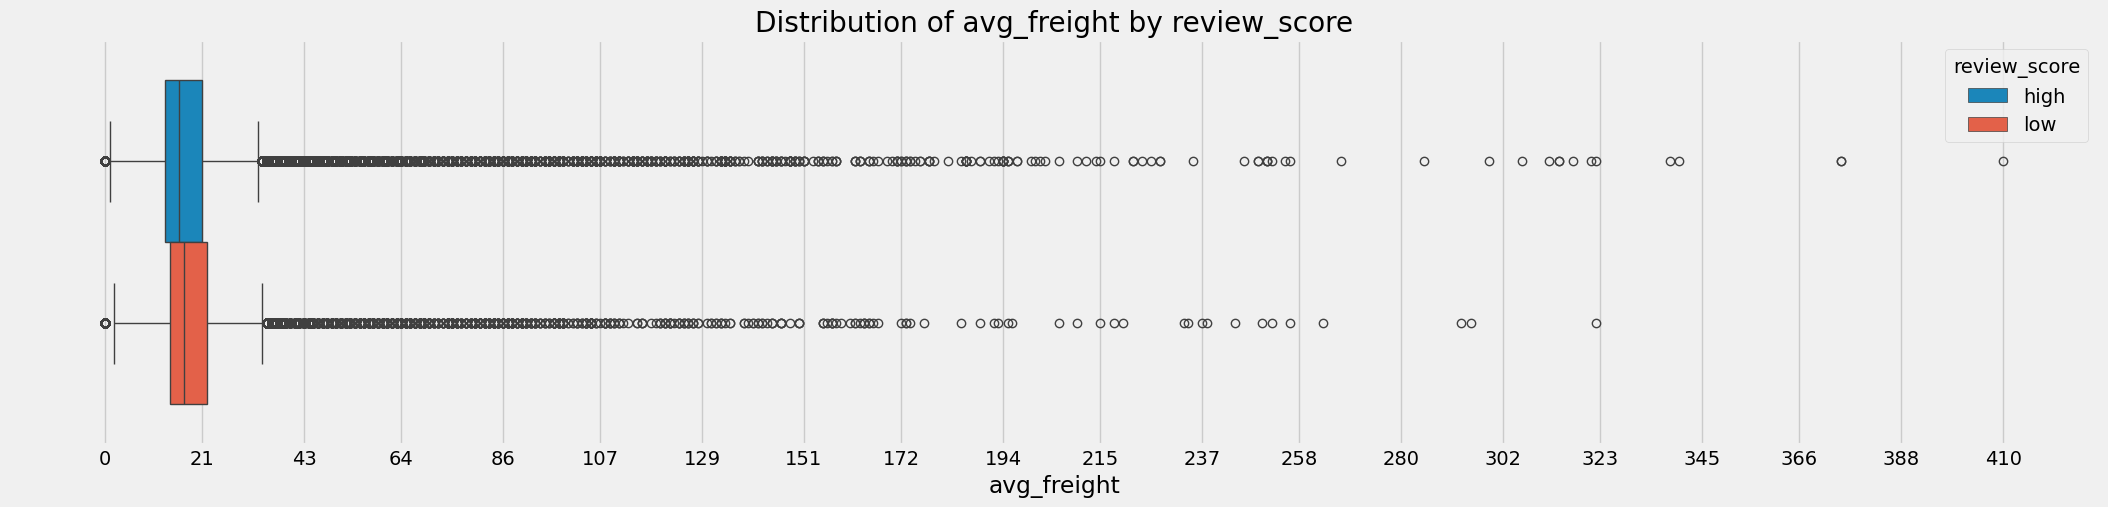

In [74]:
plt.figure(figsize=(24,5))
P.box_in_all_class(column='avg_freight',data= data,target='review_score')

In [75]:
data.groupby('review_score')['avg_freight'].describe().round(2).T

review_score,high,low
count,76470.00,22754.00
mean,19.87,20.51
std,15.47,16.90
min,0.00,0.00
25%,13.00,14.00
50%,16.00,17.00
75%,21.00,22.00
max,410.00,322.00


**we dont see anything specific for freight_value as well for low and high review_score**

**max_attempt**

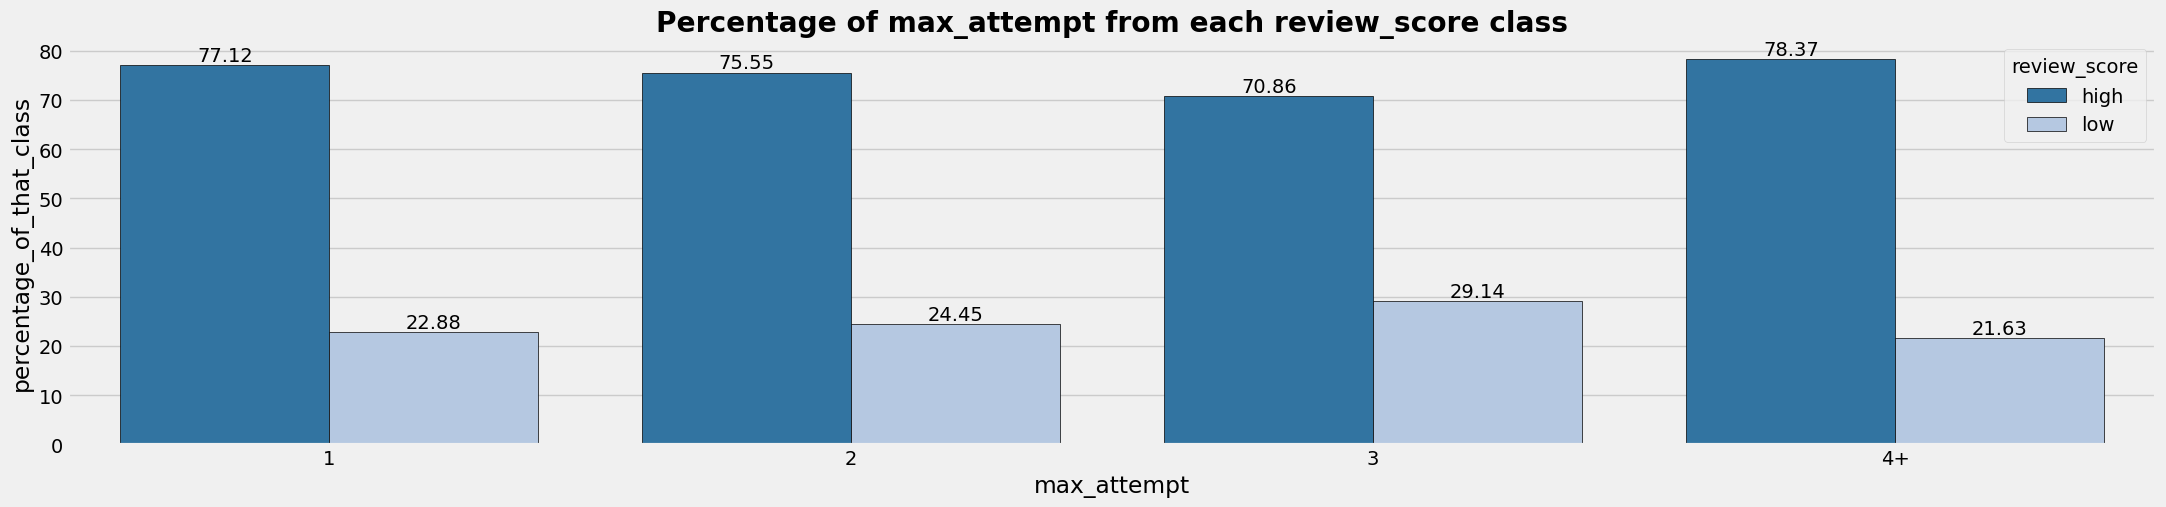

In [76]:
plt.figure(figsize=(24,5))
P.percentage_in_that_class(column='max_attempt',data=data,target='review_score',orient='v')

**from visulas we do not see anything specific difference in review_score by different max_attempt**

**installment_duration**

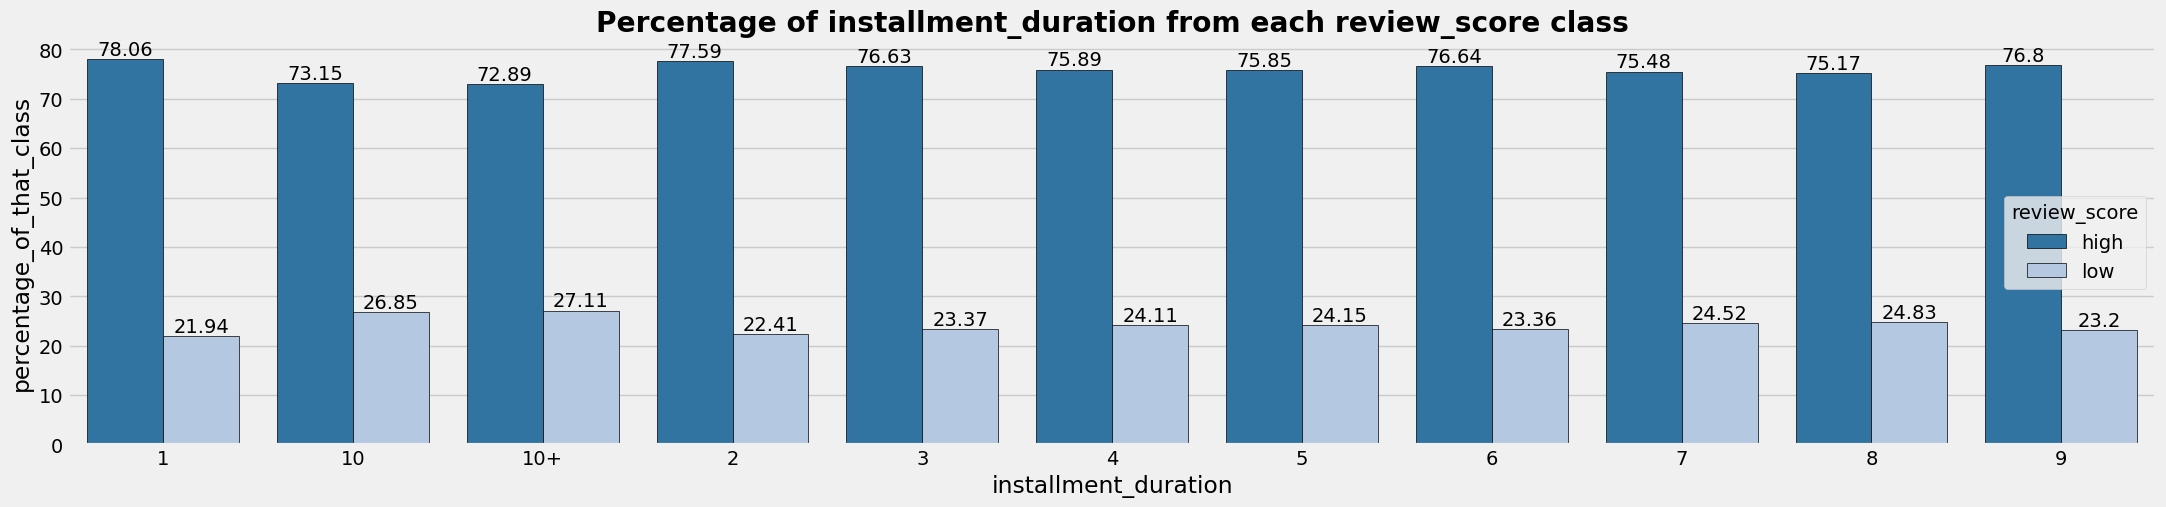

In [77]:
plt.figure(figsize=(24,5))
P.percentage_in_that_class(column='installment_duration',data=data,target='review_score',orient='v')

**from visuals, we do not see any specific difference in review_score for different installment_duration**

**total_paid_value**

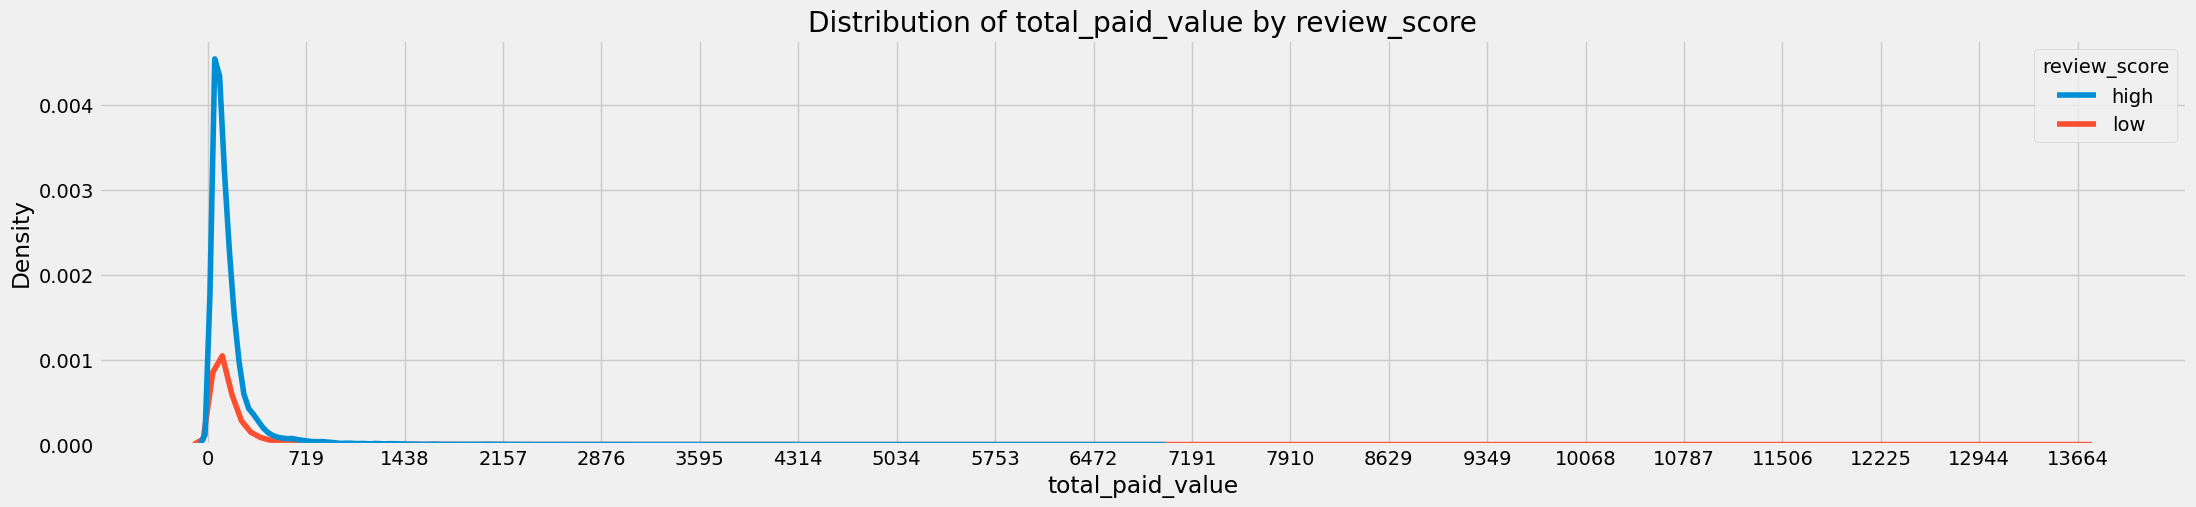

In [78]:
plt.figure(figsize=(24,5))
P.kde_in_all_class(column='total_paid_value',data= data,target='review_score')

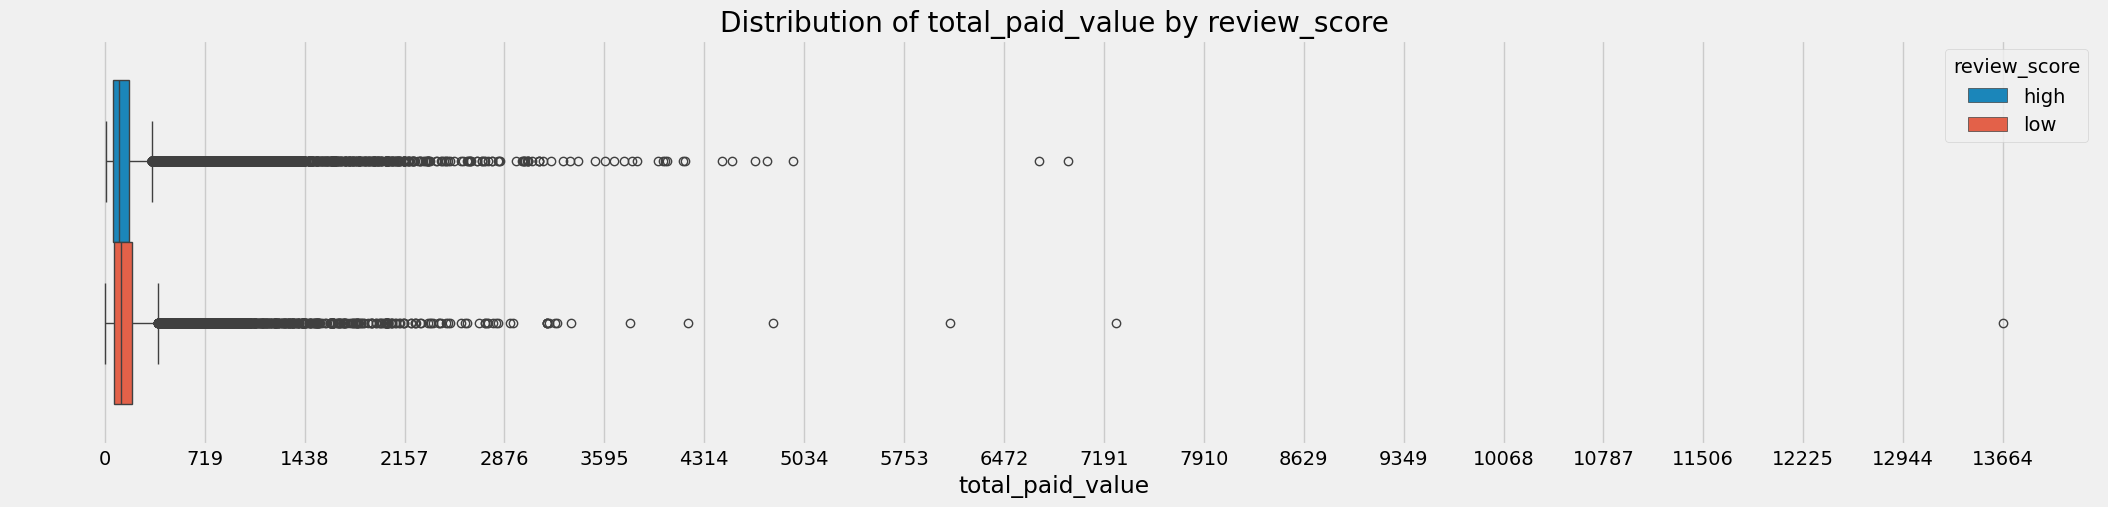

In [79]:
plt.figure(figsize=(24,5))
P.box_in_all_class(column='total_paid_value',data= data,target='review_score')

In [80]:
# temp = data[data['total_paid_value'] < 10000]
data.groupby('review_score')['total_paid_value'].describe().round(2).T

review_score,high,low
count,76470.00,22754.00
mean,155.82,176.48
std,207.86,257.17
min,9.59,0.00
25%,60.89,65.11
50%,103.04,112.28
75%,172.71,192.52
max,6929.31,13664.08


In [81]:
S.numerical_test(data,'review_score','total_paid_value','high')

Data has normal distribution so doing ttest_ind ->
Data do not have equal variance
Doing ttest - with equal variance false...
T-test p-value: 0.00000 → Reject null (groups different)
Strength of ttest: very weak


**we did not see something specific from the visuals but the mean was different for some outliers, still did statistical test and found a very weak relationship**

**approval_time**

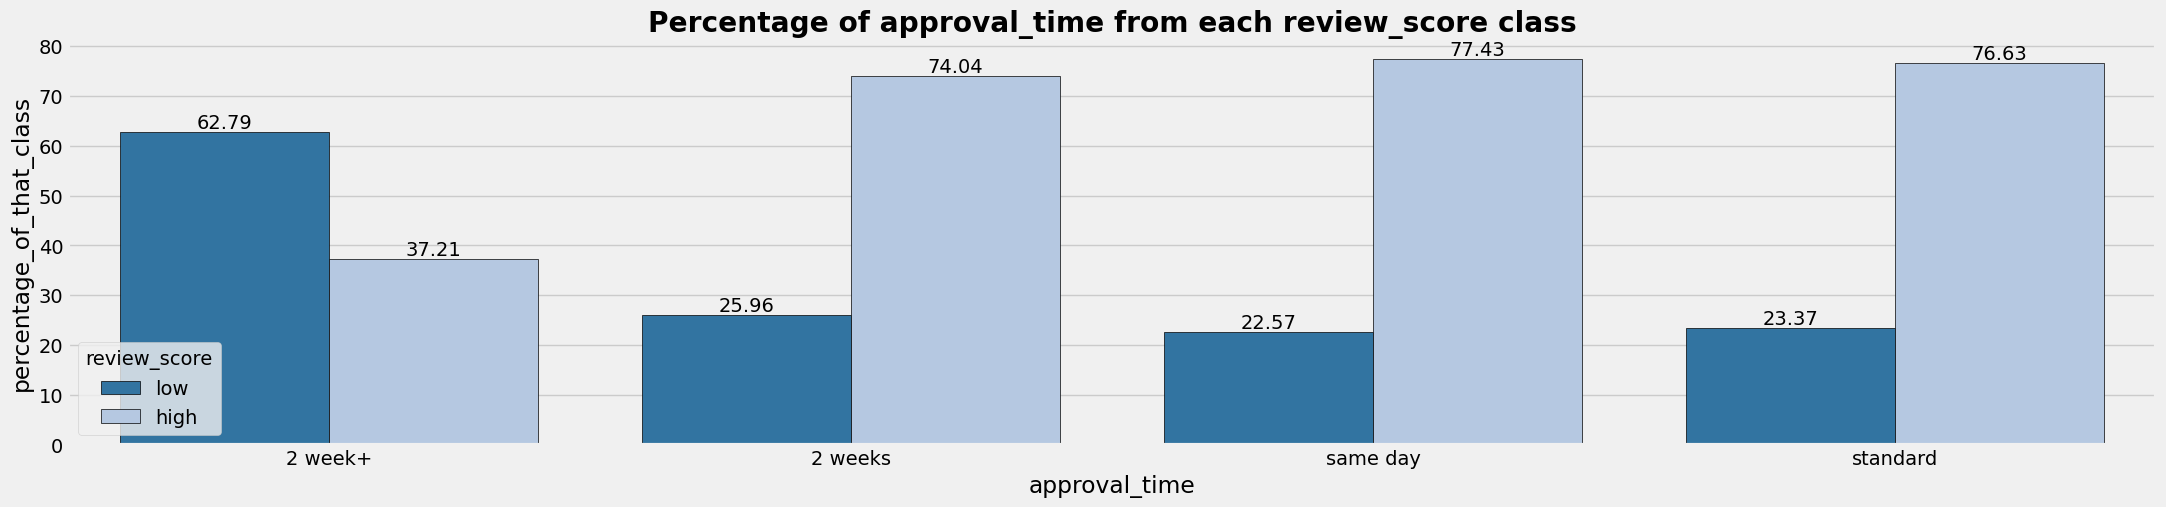

In [82]:
plt.figure(figsize=(24,5))
P.percentage_in_that_class(column='approval_time',data=data,target='review_score',orient='v')

In [83]:
approval_time_mask = (data['approval_time']=='2 week+')
ct = pd.crosstab(approval_time_mask,data['review_score'])

S.chi_sqared_test(ct)

Chi-square p-value: 0.00000
Reject null (groups different)
Cramer's V: 0.039 → Weak


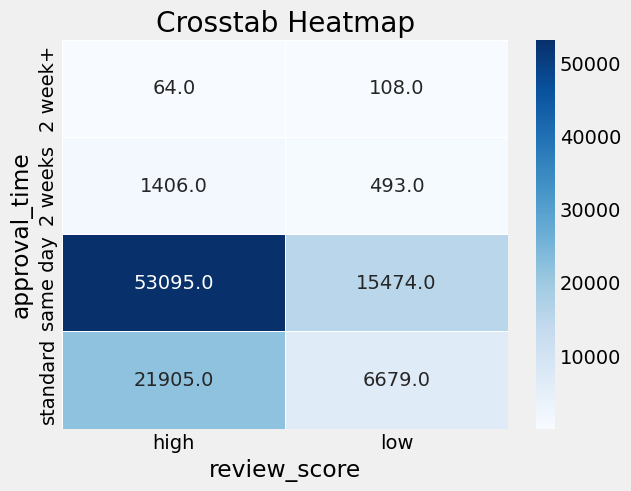

In [84]:
ct = pd.crosstab(data['approval_time'],data['review_score'])

P.plot_heatmap(ct)

***
- **By visuals we saw that the` more low reviews are from those orders which took more than 2 weeks to approve`, after doing statistical test we can validate this assumption with weak strength**
***

**delivery_delay**

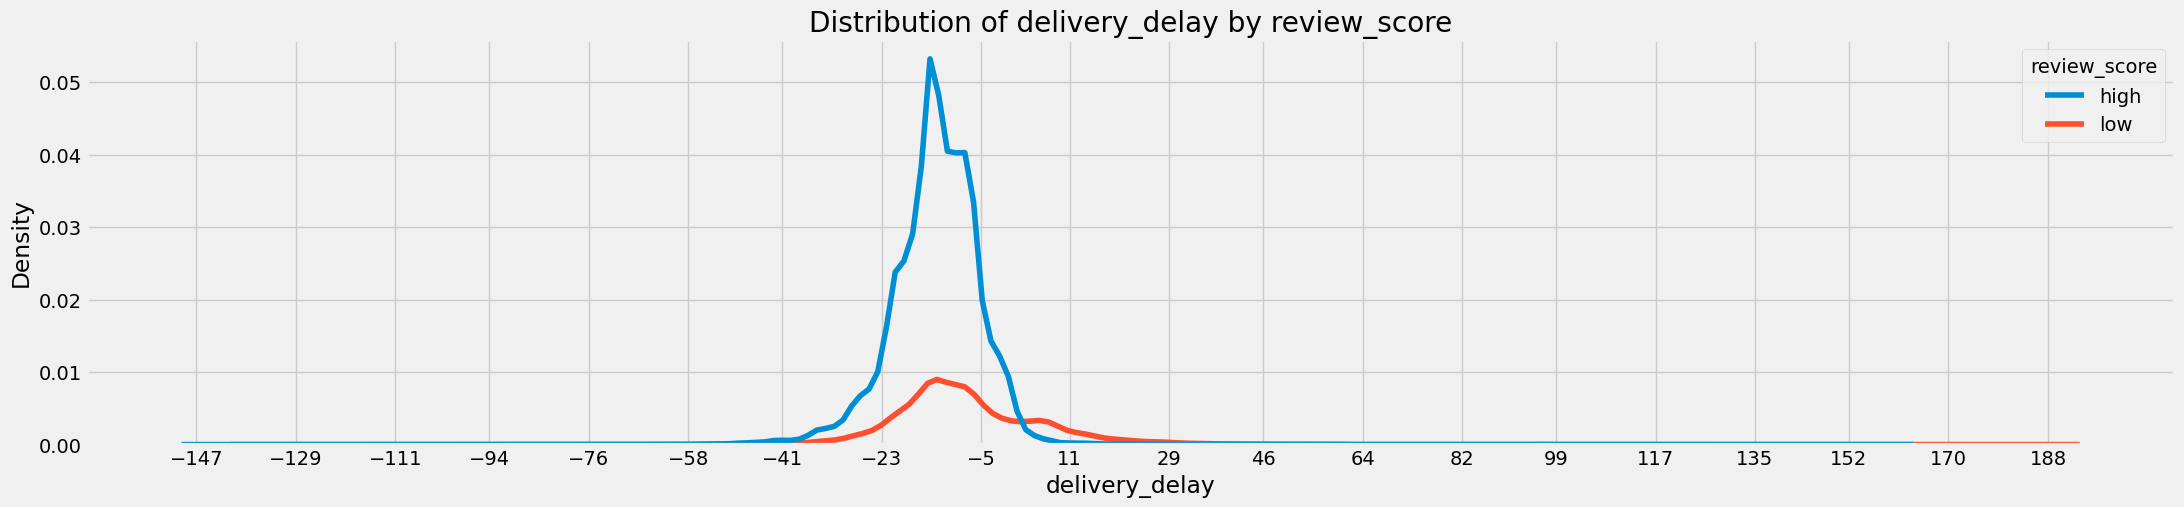

In [85]:
plt.figure(figsize=(24,5))
P.kde_in_all_class(column='delivery_delay',data= data,target='review_score')

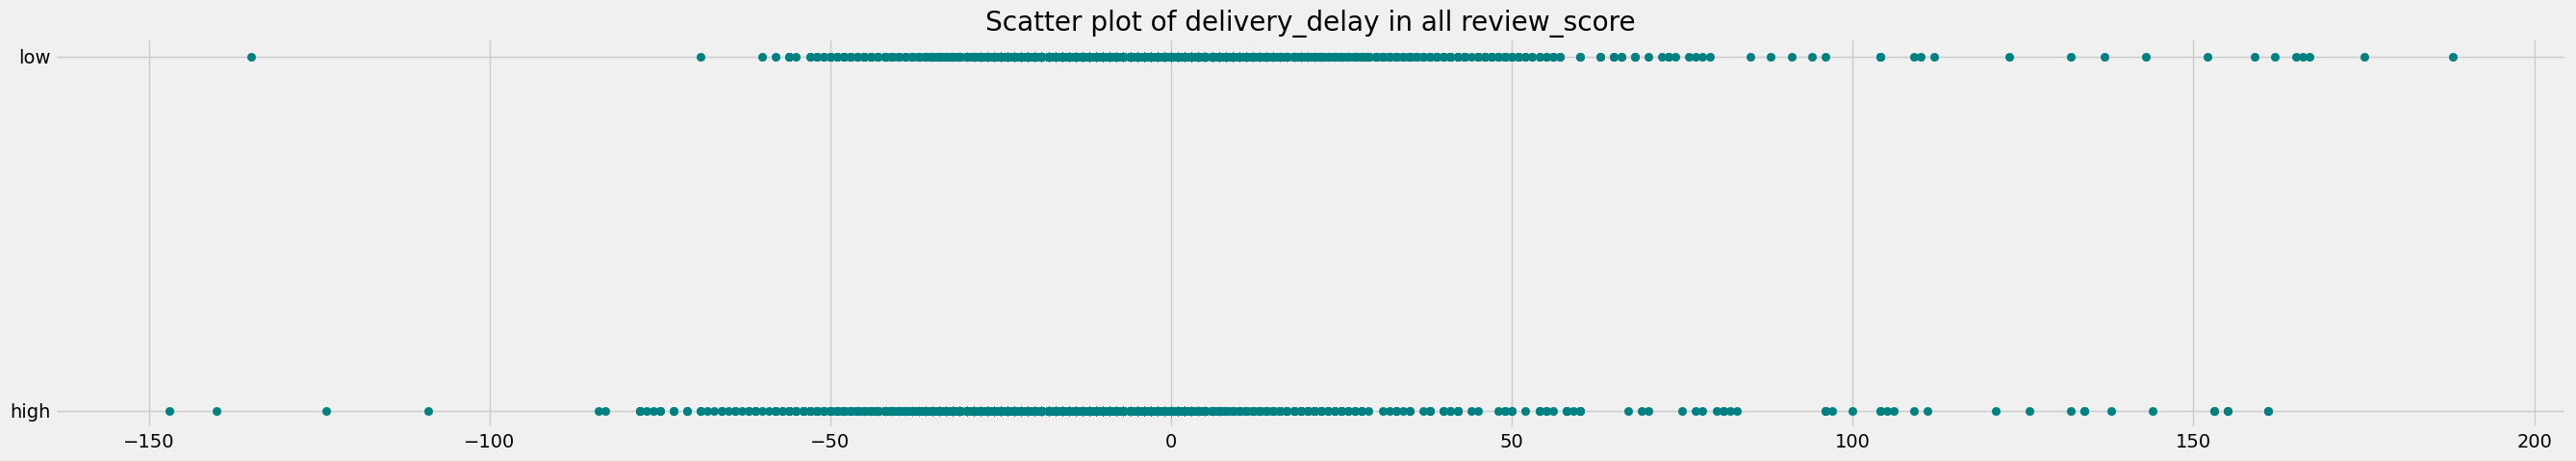

In [86]:
plt.figure(figsize=(30,5))
P.scatter_in_all_class('delivery_delay','review_score',data)


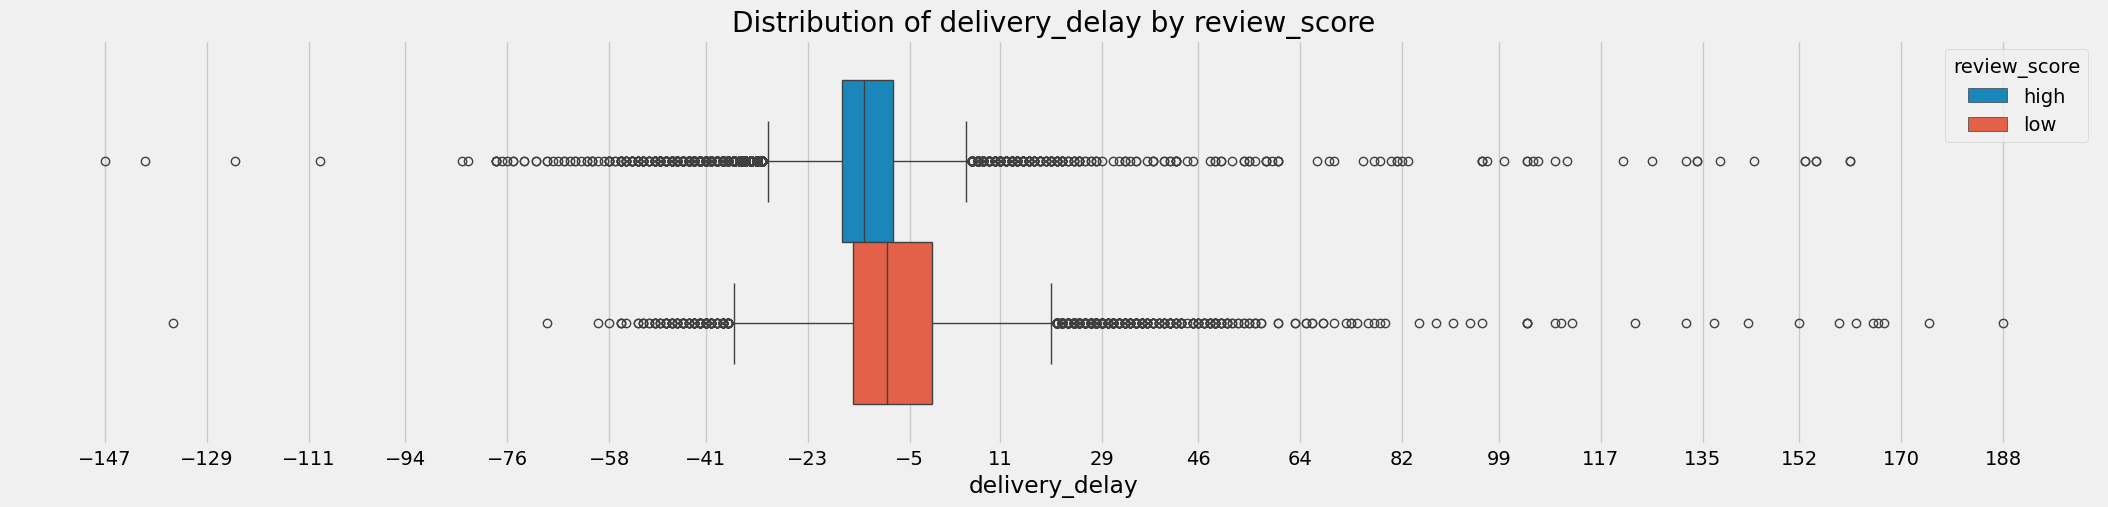

In [87]:
plt.figure(figsize=(24,5))
P.box_in_all_class(column='delivery_delay',data= data,target='review_score')

In [88]:
before_due_date_delivery = data[data['delivery_delay'] < 0]
after_due_daet_delivery = data[data['delivery_delay'] >= 0]

In [89]:
before_due_date_delivery.groupby('review_score')['delivery_delay'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
review_score,,,,,,,,
high,73382.0,-13.79,7.32,-147.0,-18.0,-13.0,-9.0,-1.0
low,15276.0,-13.35,7.62,-135.0,-17.0,-13.0,-8.0,-1.0


In [90]:
after_due_daet_delivery.groupby('review_score')['delivery_delay'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
review_score,,,,,,,,
high,2665.0,4.84,14.32,0.0,0.0,1.0,4.0,161.0
low,5036.0,10.84,12.97,0.0,4.0,7.0,14.0,188.0


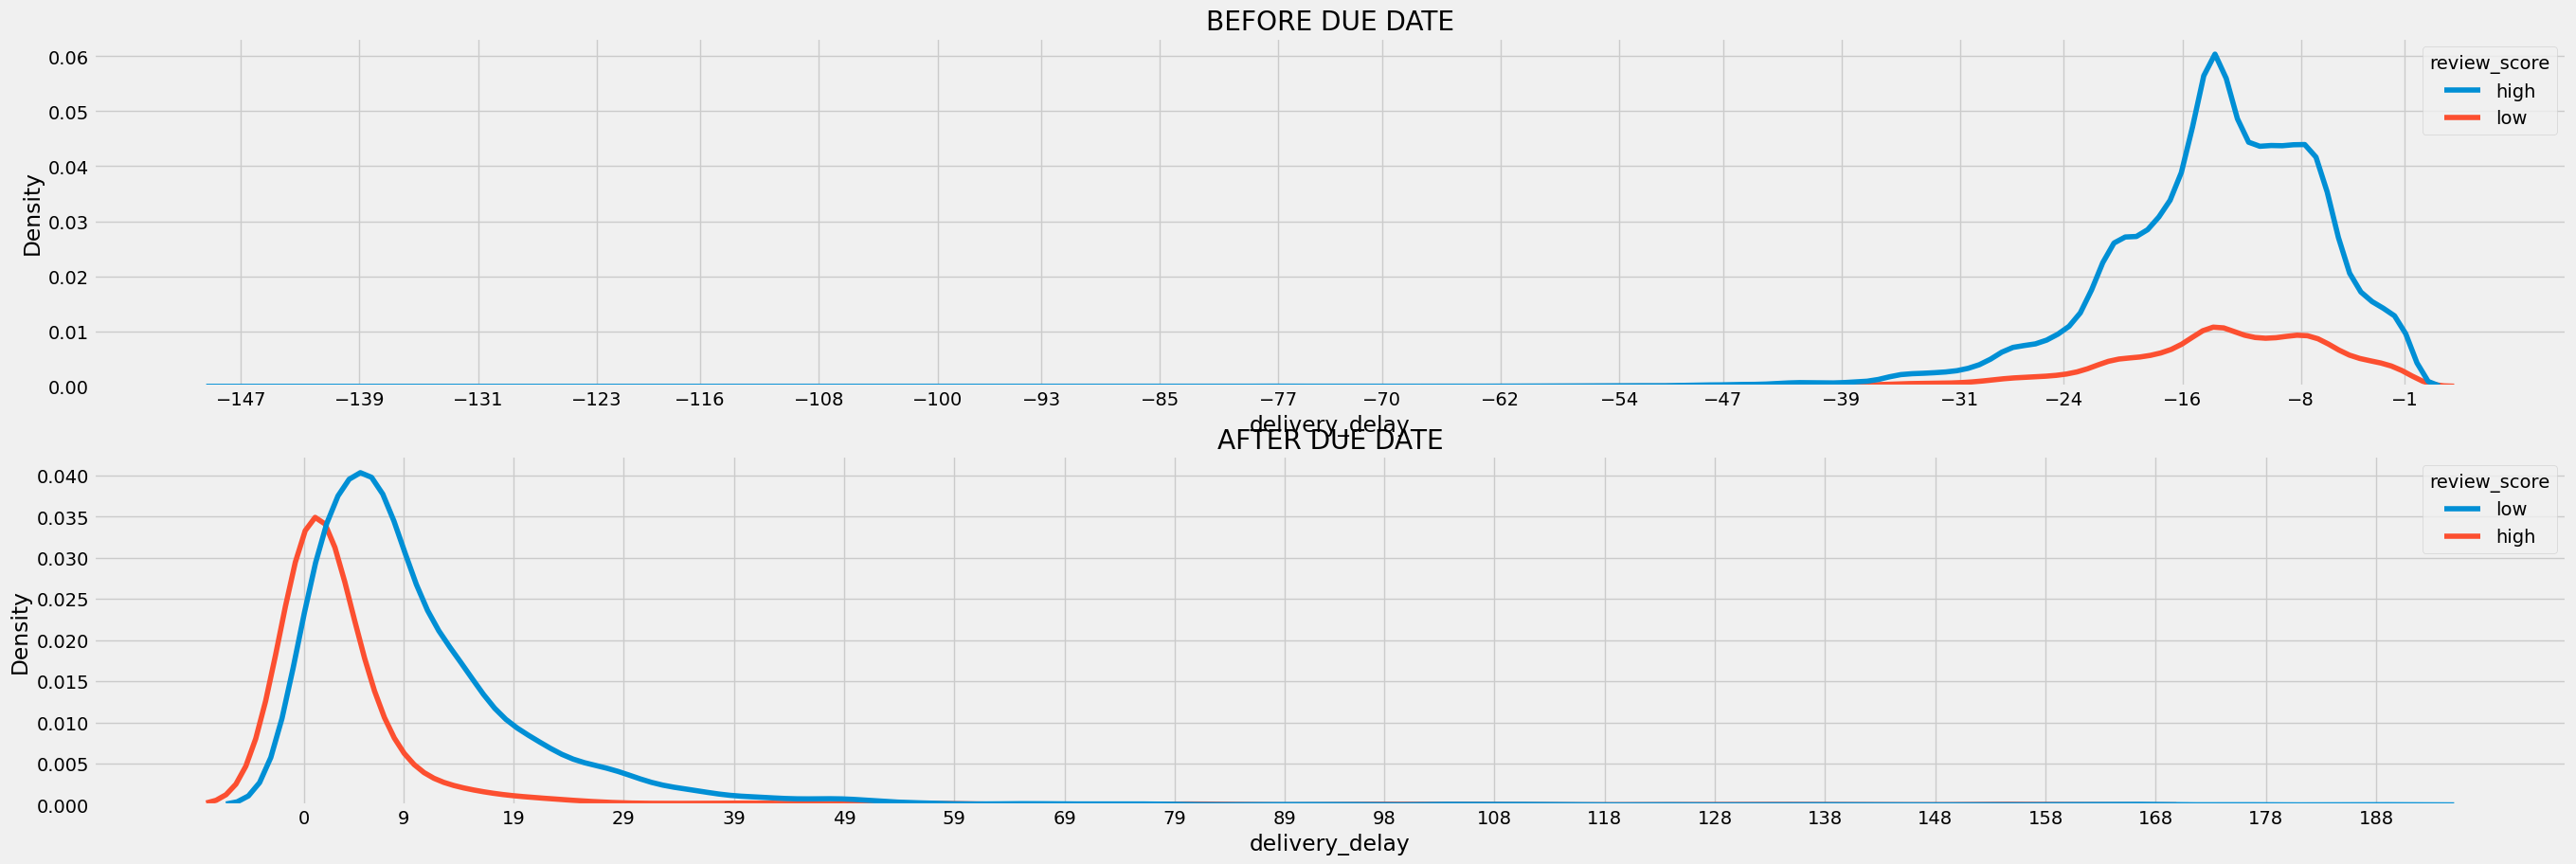

In [91]:
plt.figure(figsize=(30,10))
plt.subplot(2,1,1)
P.kde_in_all_class(column='delivery_delay',data= before_due_date_delivery,target='review_score')
plt.title('BEFORE DUE DATE')
plt.subplot(2,1,2)
P.kde_in_all_class(column='delivery_delay',data= after_due_daet_delivery,target='review_score')
plt.title('AFTER DUE DATE')
plt.show()

In [92]:
S.numerical_test(data,'review_score','delivery_delay','high')

Data has normal distribution so doing ttest_ind ->
Data do not have equal variance
Doing ttest - with equal variance false...
T-test p-value: 0.00000 → Reject null (groups different)
Strength of ttest: medium


***
- **from multiple visuals I saw that `before the estimated delivery date high ratings are more, but after the estimated delivery date low ratings are more`, after doing statistical test we can validate this assumption with medium strength**
***

**dimensional weight**

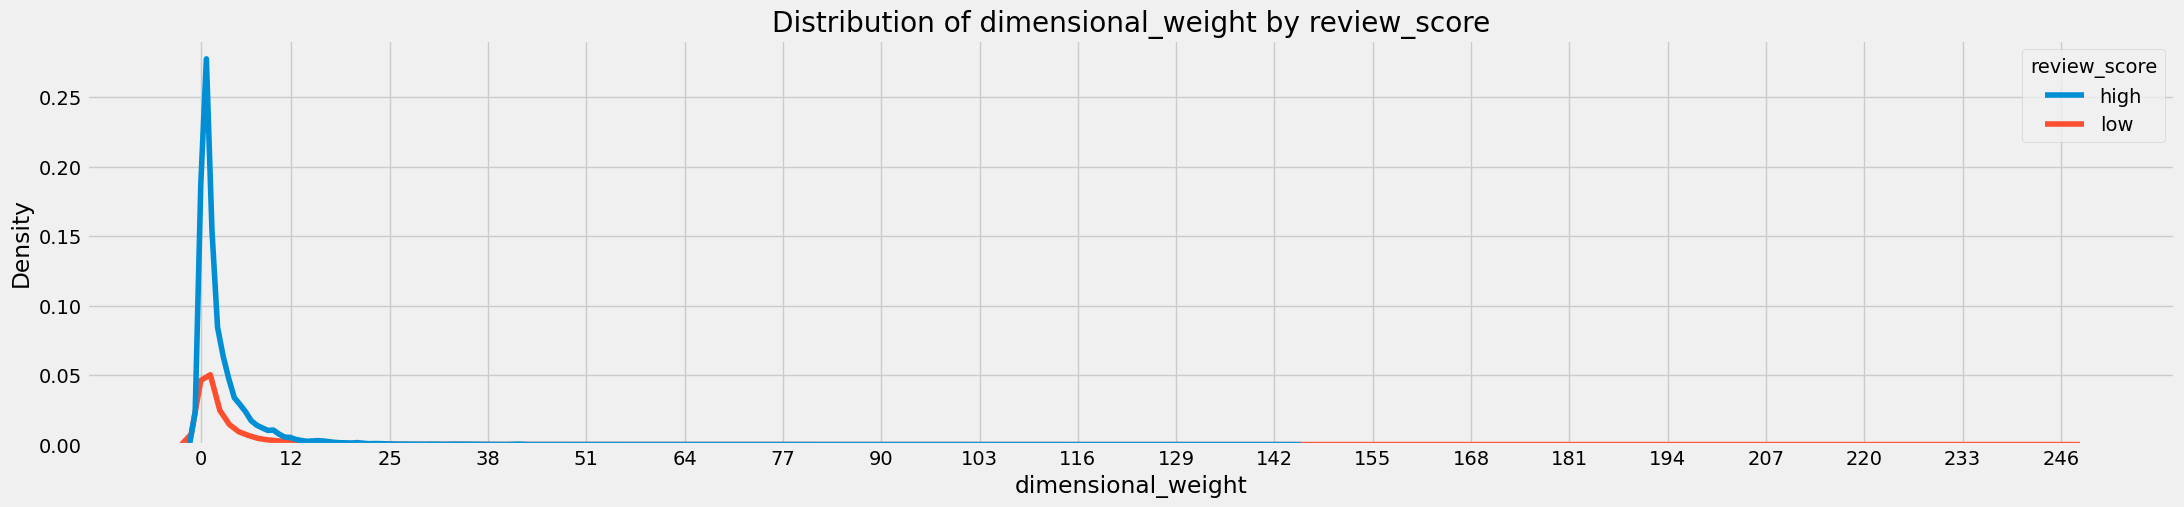

In [93]:
plt.figure(figsize=(24,5))
P.kde_in_all_class(column='dimensional_weight',data= data,target='review_score')

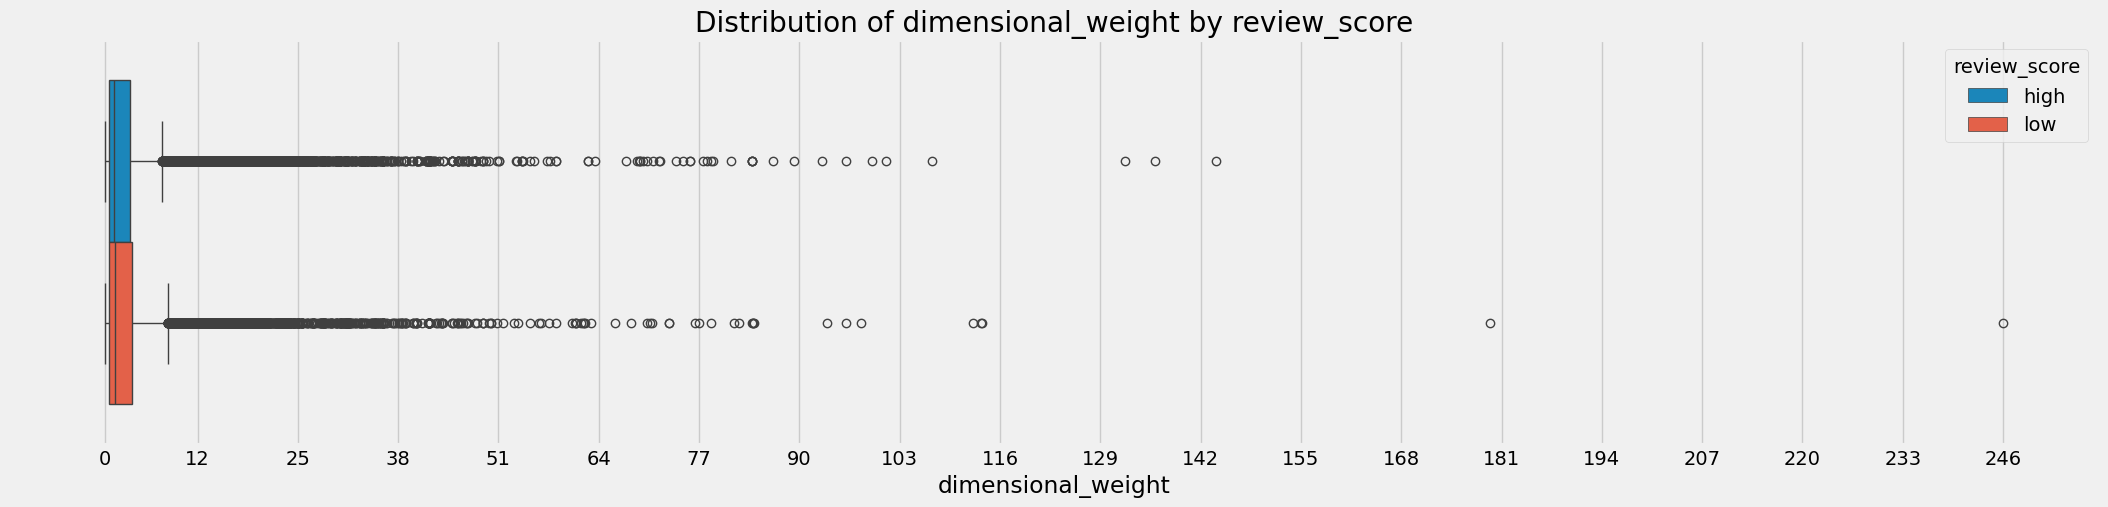

In [94]:
plt.figure(figsize=(24,5))
P.box_in_all_class(column='dimensional_weight',data= data,target='review_score')

In [95]:
data.groupby('review_score')['dimensional_weight'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
review_score,,,,,,,,
high,76470.0,2.75,4.62,0.0,0.49,1.15,3.27,144.0
low,22754.0,3.30,6.23,0.0,0.48,1.29,3.55,246.0


- **we do not find any specific difference in ratings for difference dimensional weight**